In [11]:
import cv2
import numpy as np
from math import sqrt 
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
from skimage.feature import canny
import matplotlib.pyplot as plt

In [12]:
from keras.models import Sequential, model_from_json,model_from_yaml
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('C:/Users/soltan/Desktop/project jupyter/HRDv9.h5')
# model = model_from_json(open('HRDv2.json').read())# 
# # model = model_from_yaml(open('HRDv2.yaml').read())#  
# model.load_weights('C:/Users/soltan/Desktop/project jupyter/HRDv2.h5')
# print(model.metrics_names)

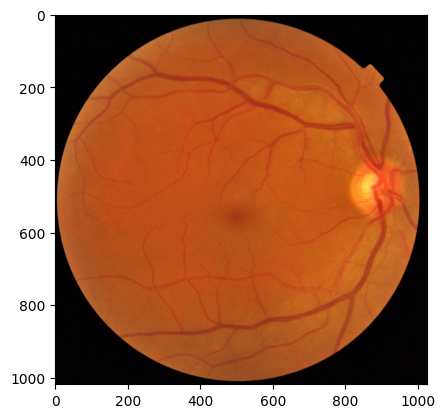

In [13]:
img = cv2.imread('C:/Users/soltan/Desktop/project jupyter/DB/try3.jpeg')
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/org2.tiff',img)
R,G,B = cv2.split(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()

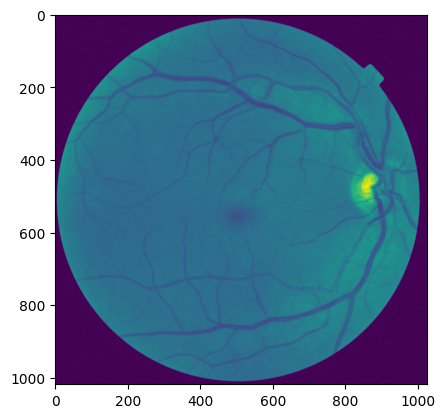

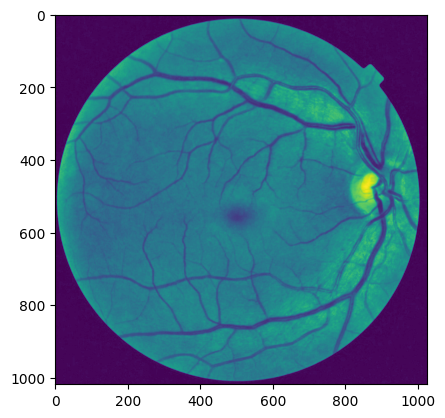

In [14]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img[:,:,1])
plt.imshow(G)
plt.show()
plt.imshow(img_clahe)
plt.show()

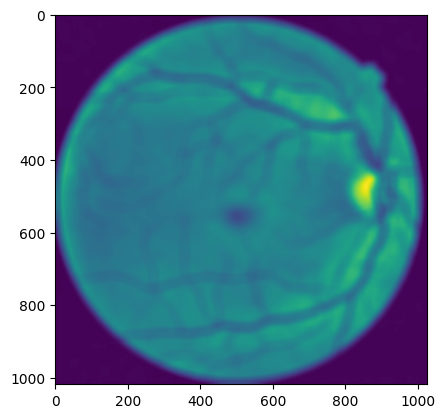

In [15]:
kernel = np.ones((31,31))/961
imgavg = cv2.filter2D(img_clahe,-1,kernel)
plt.imshow(imgavg)
plt.show()

[(856, 474)]
227


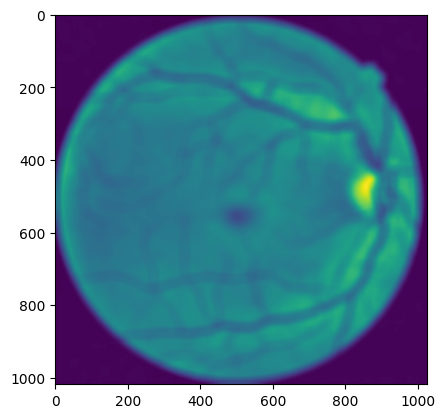

In [16]:
hist = cv2.calcHist([img_clahe],[0],None,[256],[0,256])
maxVal = -1
maxLoc = [(0,0)]
for x in range(imgavg.shape[0]):
    for y in range(imgavg.shape[1]):
        #print(x,y)
        if imgavg[x][y] >= maxVal:
            maxVal = imgavg[x][y]
            maxLoc[0] = (y,x) 
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/img.jpg',imgavg)
print(maxLoc)
loc = len(maxLoc)
imgtemp = imgavg.copy()
print(imgavg[maxLoc[0][1]][maxLoc[0][0]])
cv2.circle(imgtemp,maxLoc[loc-1],5,(0),-1)
plt.imshow(imgavg)
plt.show()

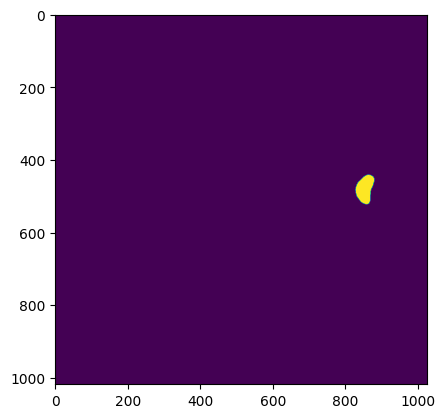

In [17]:
thresh, imgthresh = cv2.threshold(imgavg,180,255,cv2.THRESH_BINARY)
plt.imshow(imgthresh)
plt.show()

(array([[[860, 442]],

       [[859, 443]],

       [[858, 443]],

       [[857, 443]],

       [[856, 444]],

       [[855, 444]],

       [[854, 445]],

       [[853, 445]],

       [[852, 446]],

       [[851, 447]],

       [[850, 447]],

       [[849, 448]],

       [[848, 449]],

       [[847, 450]],

       [[846, 451]],

       [[845, 452]],

       [[844, 453]],

       [[843, 454]],

       [[842, 455]],

       [[841, 456]],

       [[840, 457]],

       [[839, 458]],

       [[838, 459]],

       [[837, 460]],

       [[836, 460]],

       [[836, 461]],

       [[835, 462]],

       [[834, 463]],

       [[833, 464]],

       [[833, 465]],

       [[832, 466]],

       [[832, 467]],

       [[831, 468]],

       [[831, 469]],

       [[830, 470]],

       [[830, 471]],

       [[830, 472]],

       [[829, 473]],

       [[829, 474]],

       [[829, 475]],

       [[828, 476]],

       [[828, 477]],

       [[828, 478]],

       [[828, 479]],

       [[828, 480]],

       [[

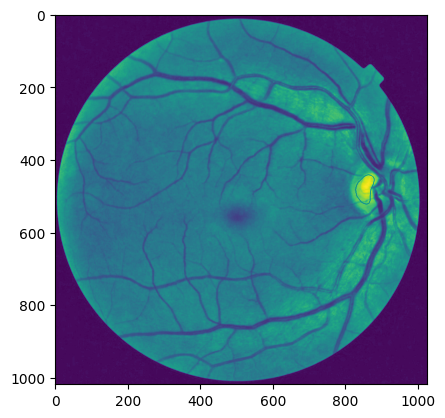

In [18]:
contours,hierarchy = cv2.findContours(imgthresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(contours)
cv2.drawContours(img_clahe, contours, contourIdx=-1, color=0, thickness=1)    
plt.imshow(img_clahe)
plt.show()

22


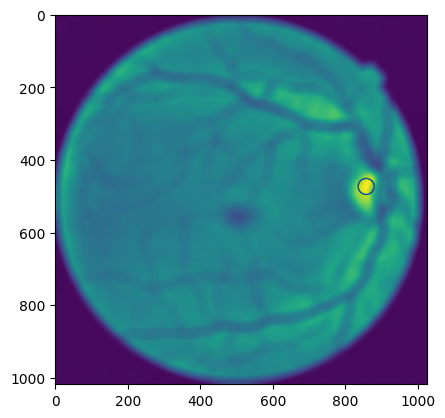

True

In [19]:
length = len(contours[0])
radius = 0
for i in range(length):
    radius = radius + sqrt((contours[0][i][0][0]-maxLoc[0][0])**2 + (contours[0][i][0][0]-maxLoc[0][0])**2)
radius = int(radius/length)
print(radius)
imgtemp2 = imgavg.copy()
cv2.circle(imgtemp2,maxLoc[loc-1],int(radius),(0),2)
plt.imshow(imgtemp2)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/Rditect.jpg',imgtemp2)

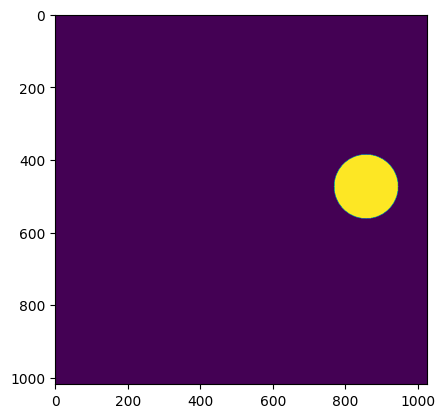

True

In [20]:
ROIrad = radius*4
mask = np.zeros((imgthresh.shape[0],imgthresh.shape[1]), dtype=np.uint8)
cv2.circle(mask,maxLoc[loc-1],ROIrad,(255),-1)
plt.imshow(mask)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/ROIi.jpg',mask)

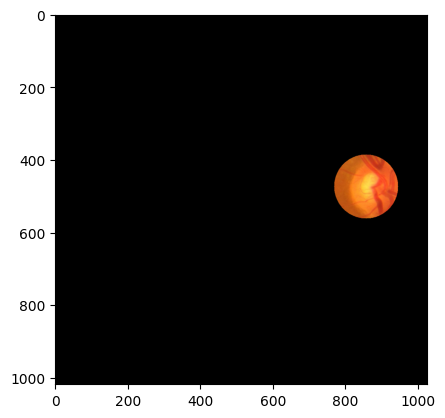

In [21]:
img_roi = cv2.bitwise_and(img, img, mask=mask)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/img_roi.tiff',img_roi)
plt.imshow(img_roi)
plt.show()

In [23]:
import numpy as np

patch_size = 27
patches = []
patches_copy = []
for i in range(0, img_clahe.shape[0]-patch_size, patch_size):
    for j in range(0, img_clahe.shape[1]-patch_size, patch_size):
        patch = img_clahe[i:i+patch_size, j:j+patch_size]
        patch = patch.reshape((patch_size, patch_size, 1)) # redimensionner le patch
        patches.append(patch)
        patches_copy.append(patch)
patches = np.array(patches)
patches = patches.astype('float32') / 255.0
predictions = model.predict(patches)
vessel_patches_copy = []
for i, patch in enumerate(patches_copy):
    if np.max(predictions[i]) == 1.0:
        patch = patch.reshape((patch_size, patch_size))
        vessel_patches_copy.append(patch)
vessel_patches = np.array(vessel_patches_copy)
vessel_patches = vessel_patches.astype('float32') / 255.0

43/43 [==============================] - 1s 22ms/step


In [24]:
print(patch.shape)
print(len(patches))
print(len(vessel_patches_copy))
print(len(vessel_patches))


(27, 27)
1369
331
331


le patch numéro= 0


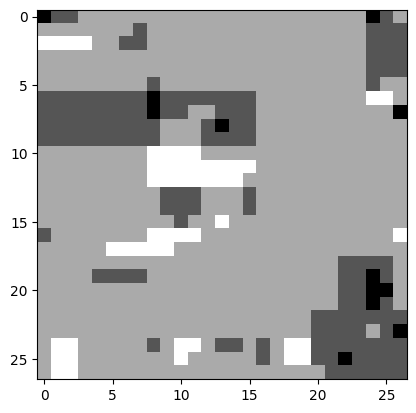

le patch numéro= 1


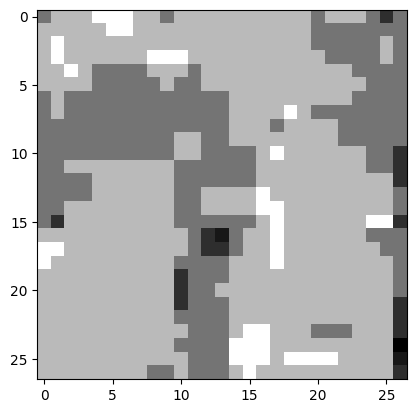

le patch numéro= 2


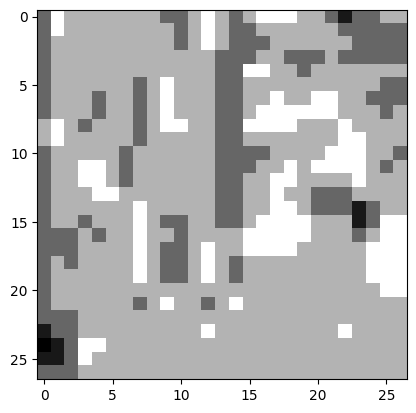

le patch numéro= 3


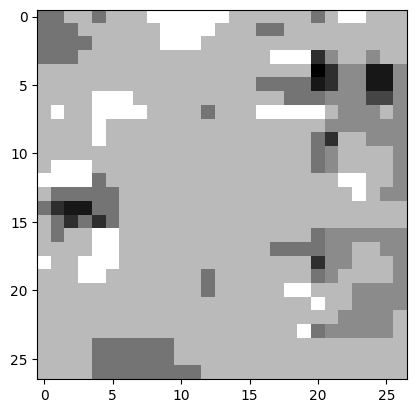

le patch numéro= 4


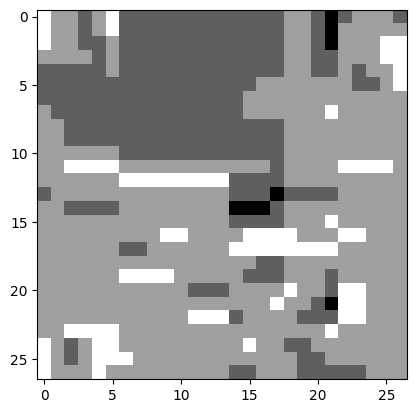

le patch numéro= 5


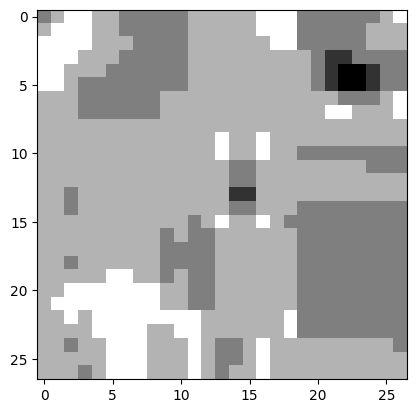

le patch numéro= 6


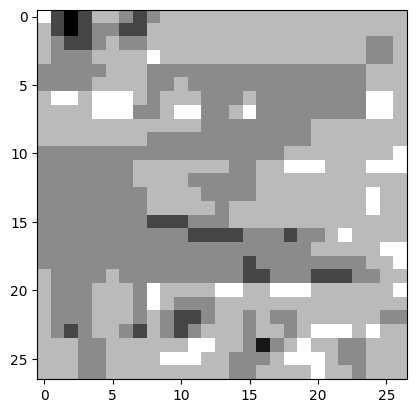

le patch numéro= 7


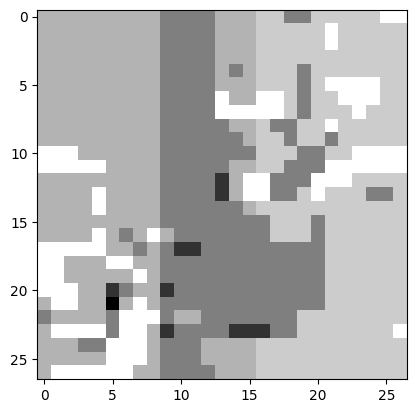

le patch numéro= 8


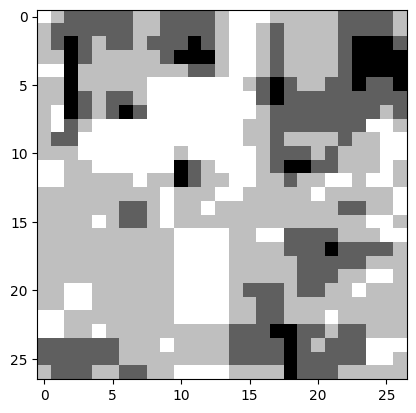

le patch numéro= 9


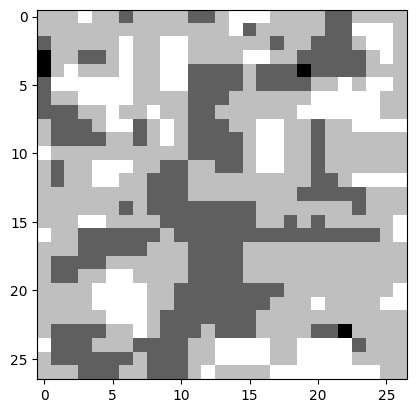

le patch numéro= 10


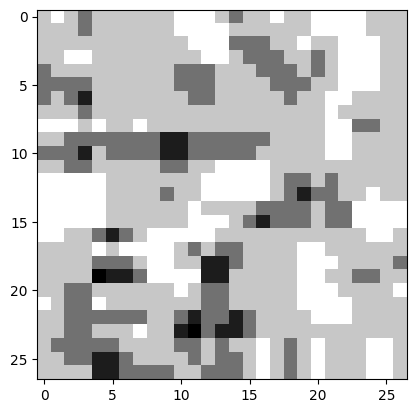

le patch numéro= 11


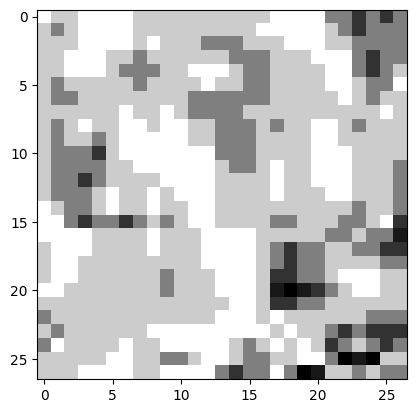

le patch numéro= 12


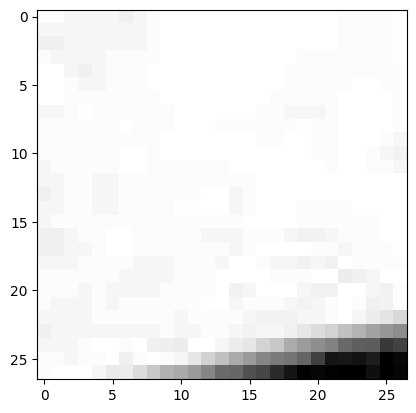

le patch numéro= 13


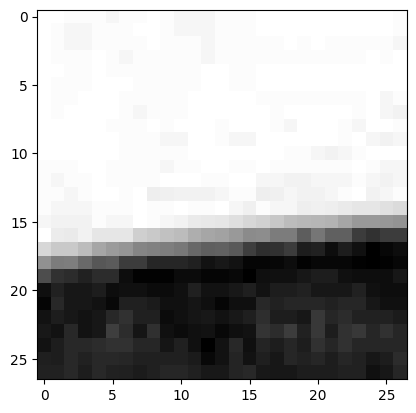

le patch numéro= 14


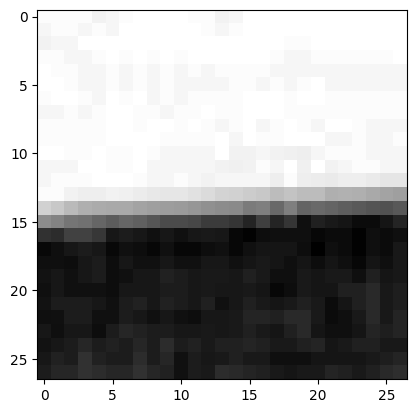

le patch numéro= 15


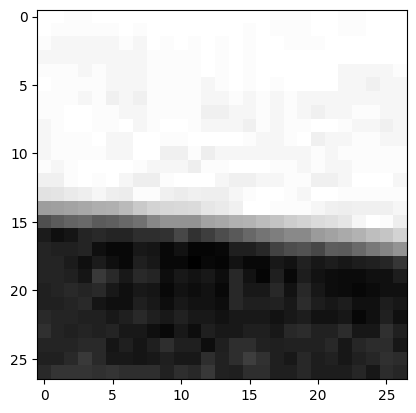

le patch numéro= 16


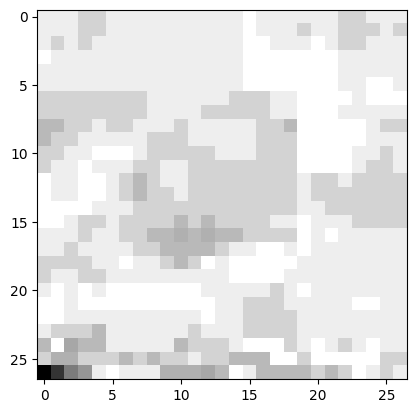

le patch numéro= 17


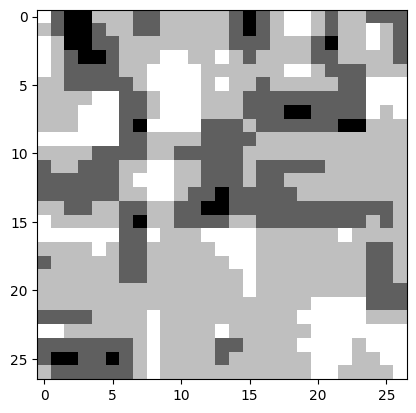

le patch numéro= 18


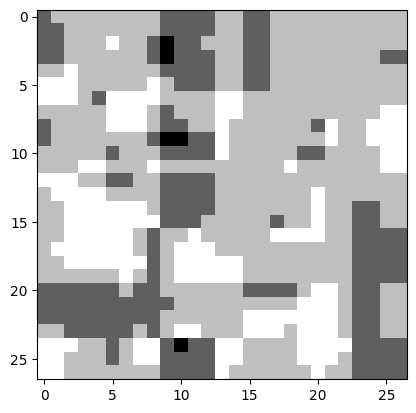

le patch numéro= 19


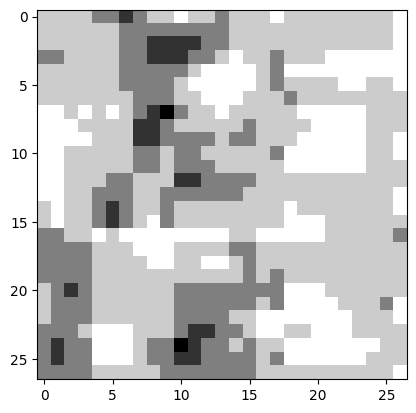

le patch numéro= 20


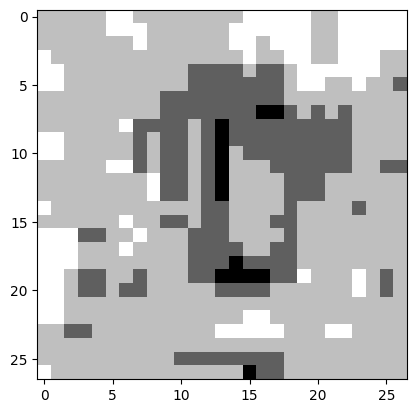

le patch numéro= 21


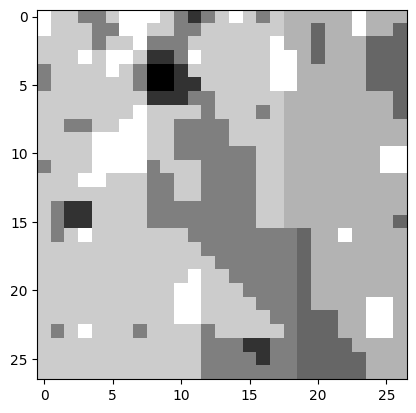

le patch numéro= 22


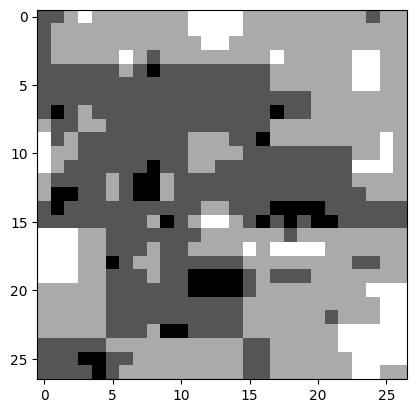

le patch numéro= 23


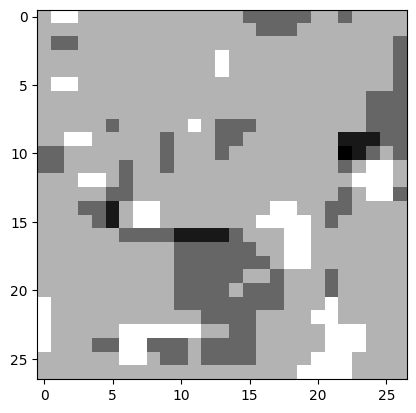

le patch numéro= 24


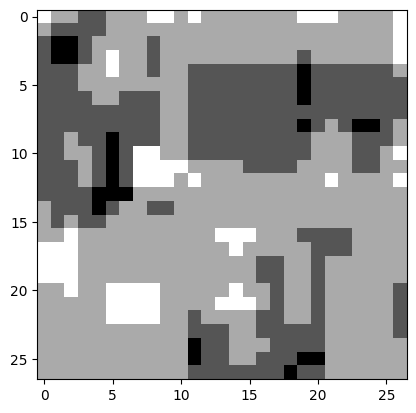

le patch numéro= 25


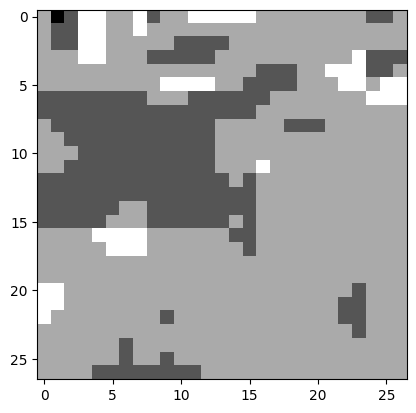

le patch numéro= 26


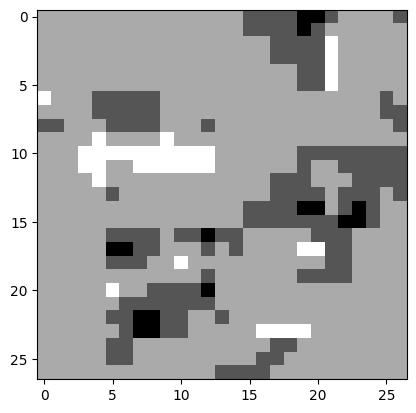

le patch numéro= 27


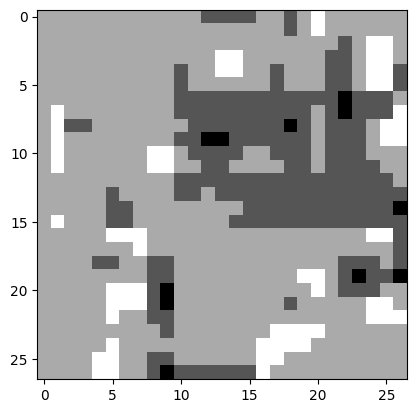

le patch numéro= 28


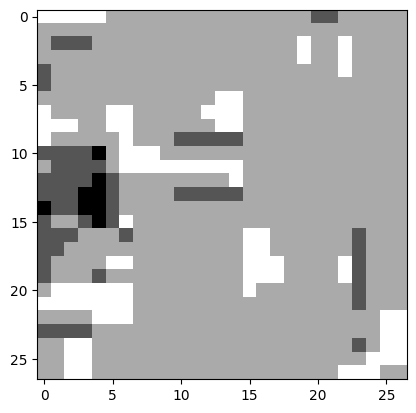

le patch numéro= 29


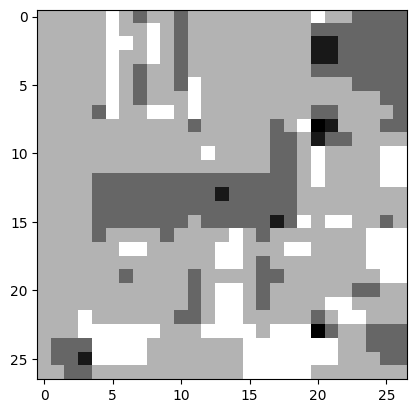

le patch numéro= 30


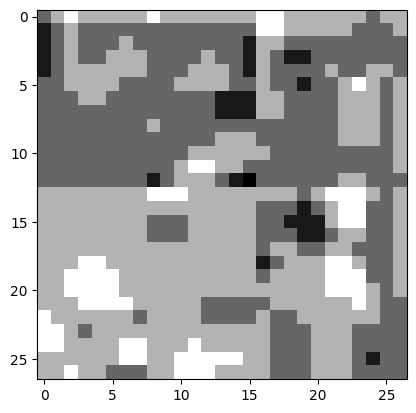

le patch numéro= 31


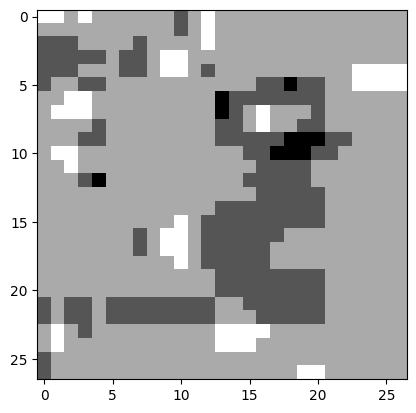

le patch numéro= 32


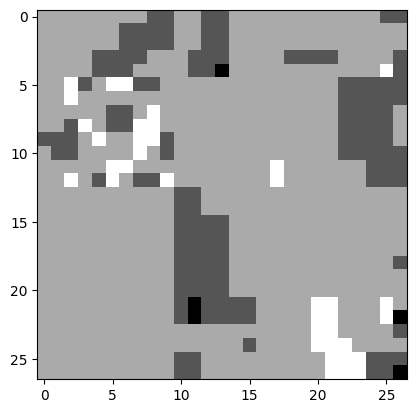

le patch numéro= 33


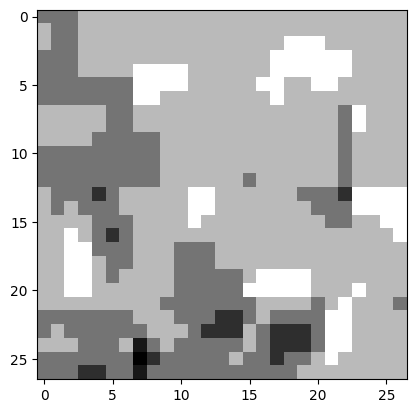

le patch numéro= 34


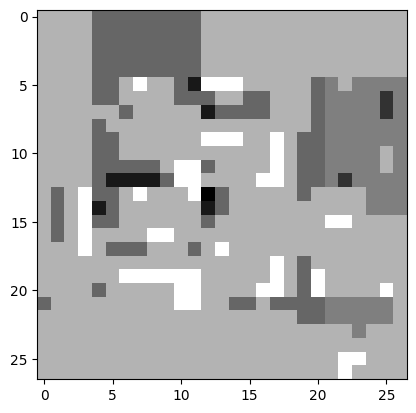

le patch numéro= 35


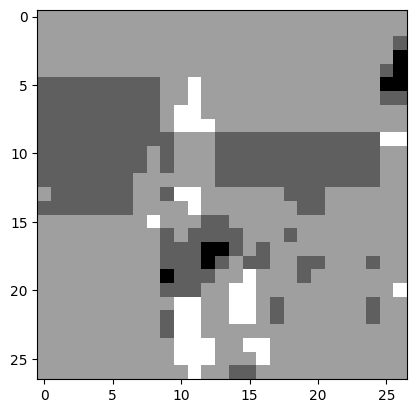

le patch numéro= 36


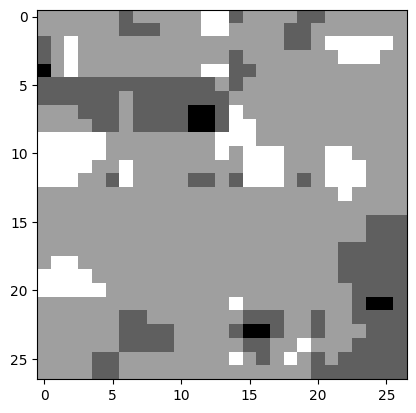

le patch numéro= 37


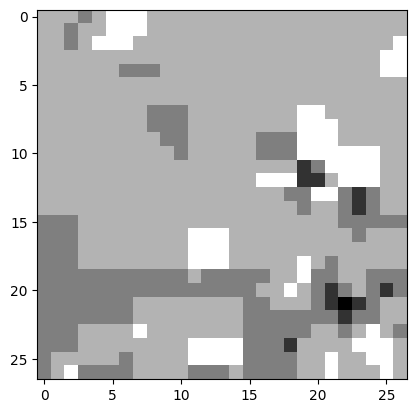

le patch numéro= 38


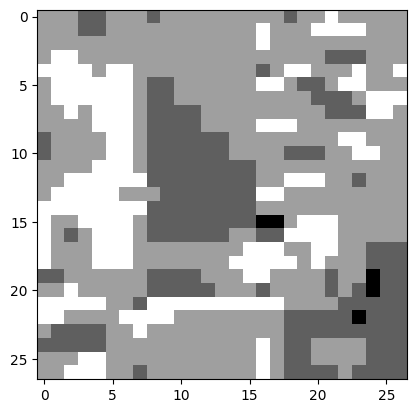

le patch numéro= 39


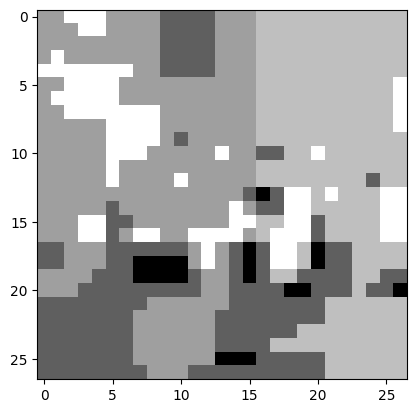

le patch numéro= 40


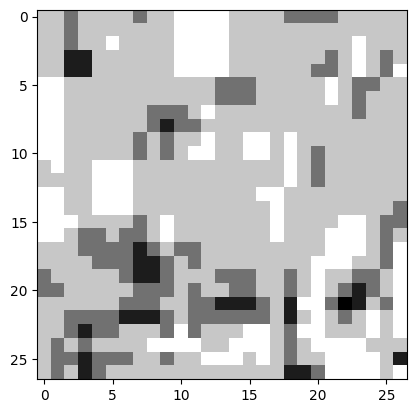

le patch numéro= 41


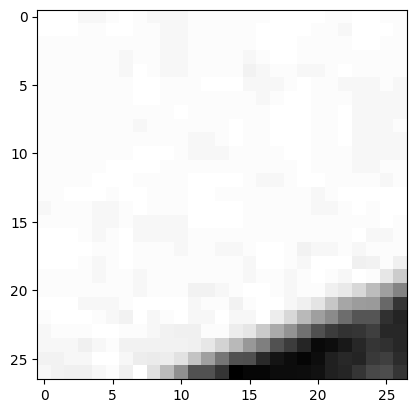

le patch numéro= 42


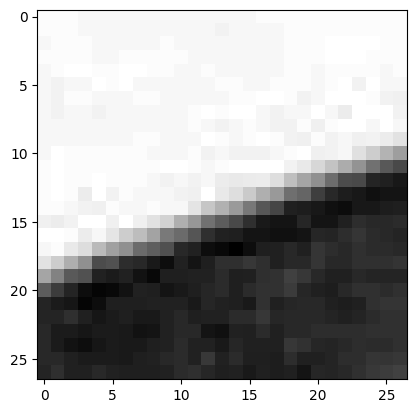

le patch numéro= 43


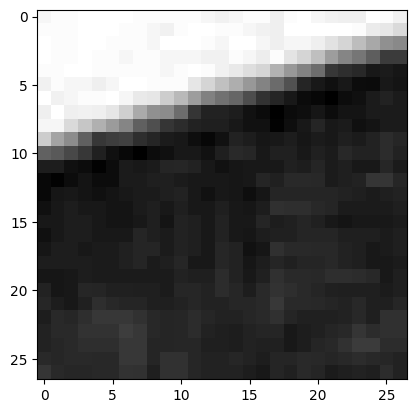

le patch numéro= 44


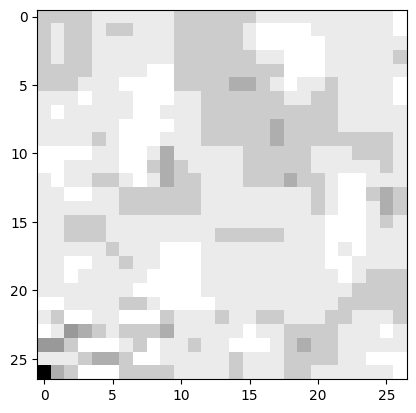

le patch numéro= 45


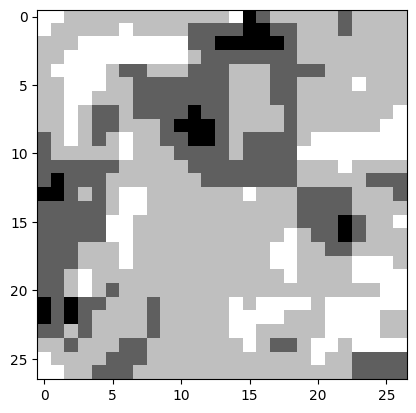

le patch numéro= 46


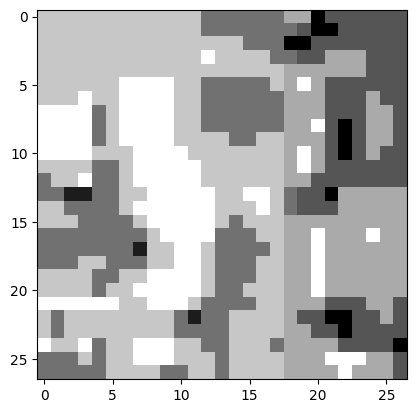

le patch numéro= 47


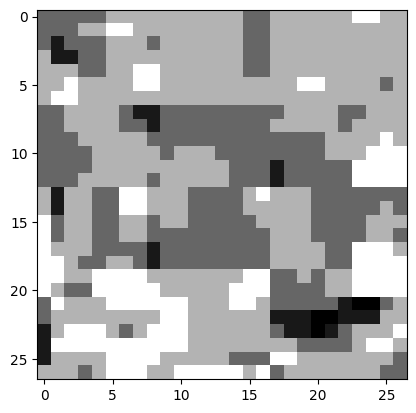

le patch numéro= 48


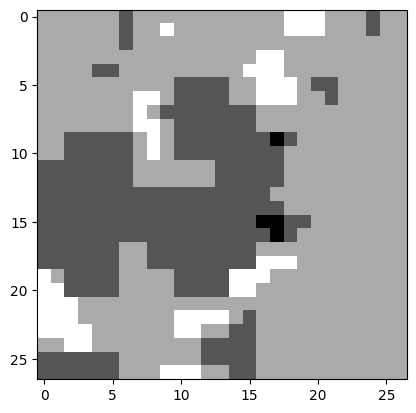

le patch numéro= 49


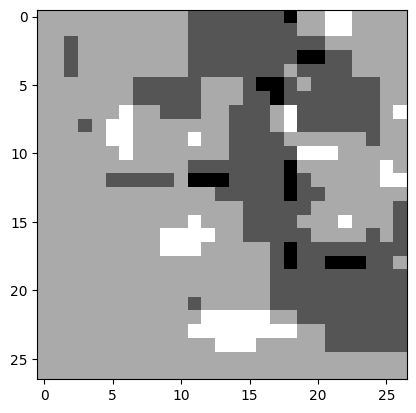

le patch numéro= 50


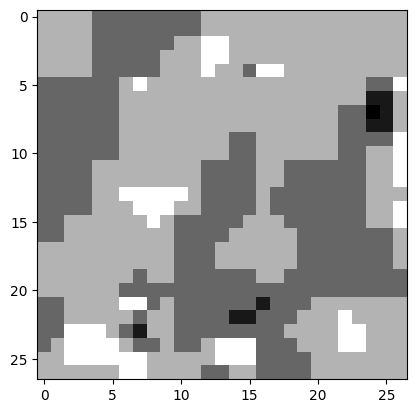

le patch numéro= 51


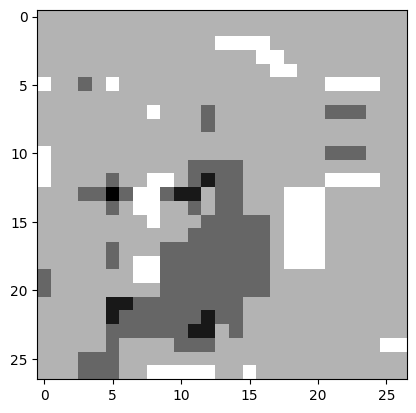

le patch numéro= 52


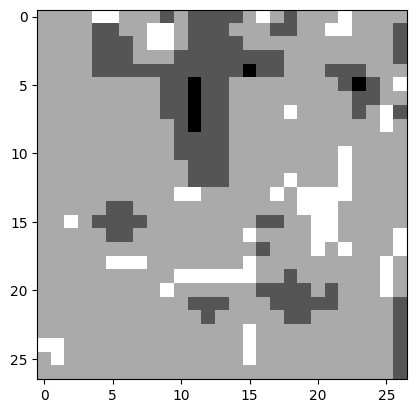

le patch numéro= 53


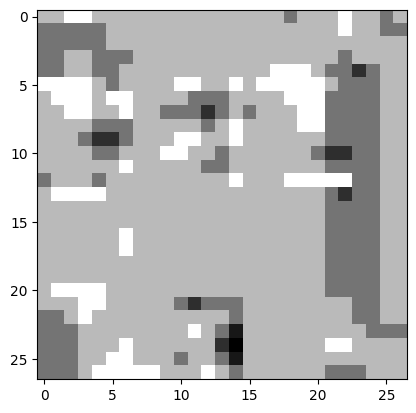

le patch numéro= 54


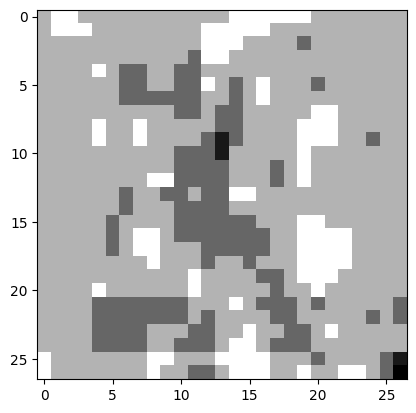

le patch numéro= 55


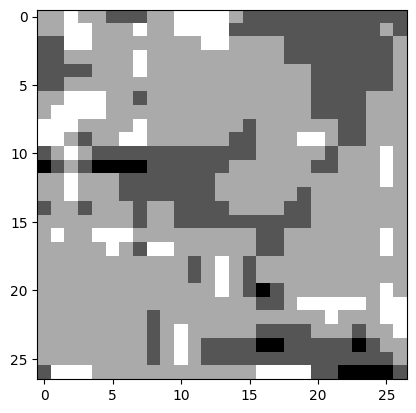

le patch numéro= 56


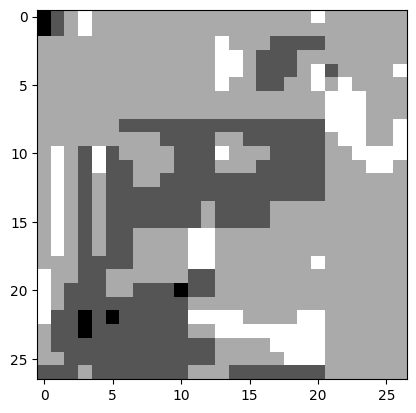

le patch numéro= 57


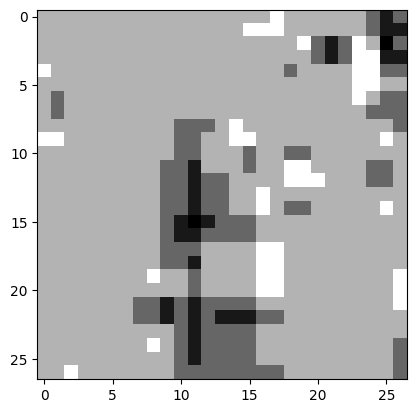

le patch numéro= 58


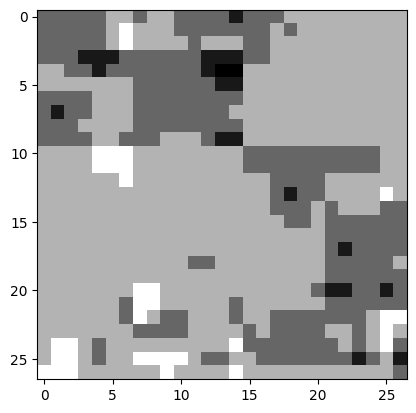

le patch numéro= 59


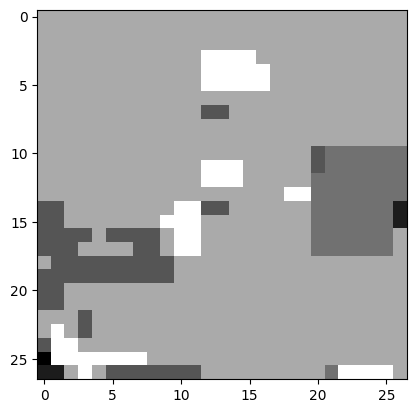

le patch numéro= 60


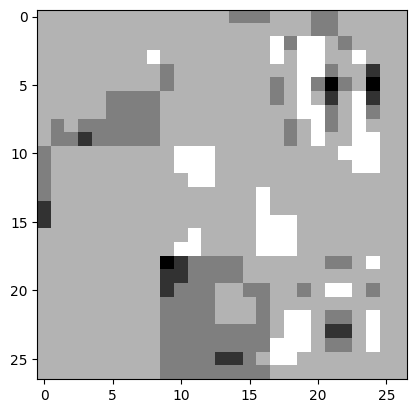

le patch numéro= 61


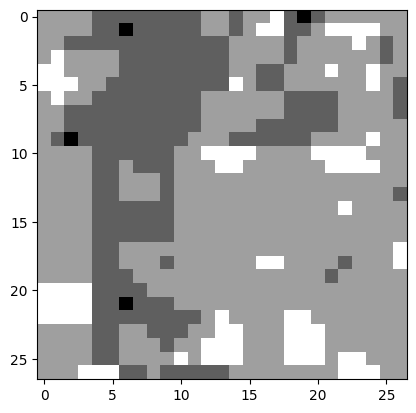

le patch numéro= 62


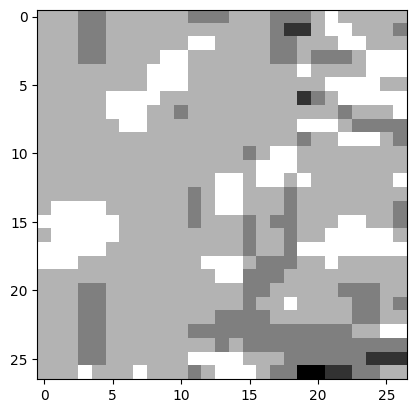

le patch numéro= 63


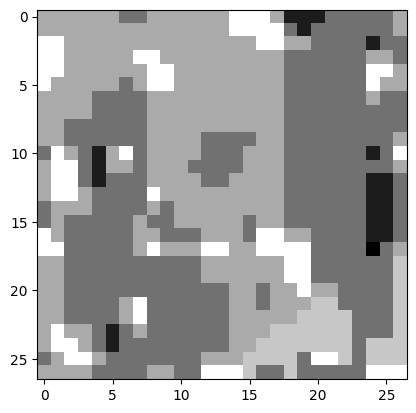

le patch numéro= 64


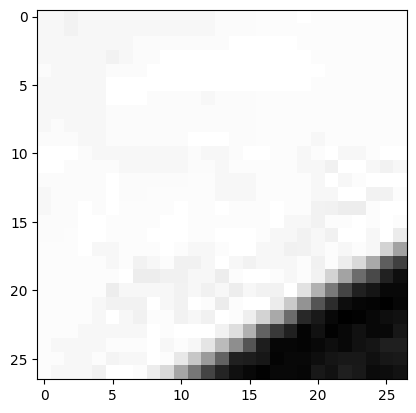

le patch numéro= 65


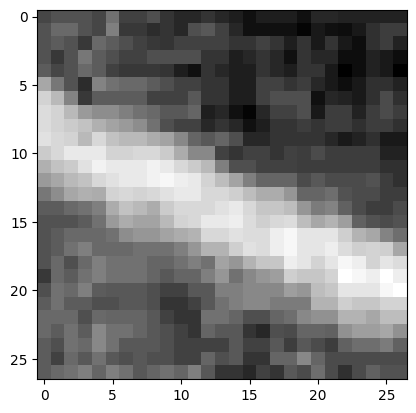

le patch numéro= 66


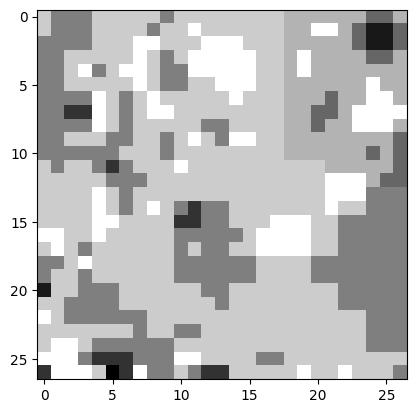

le patch numéro= 67


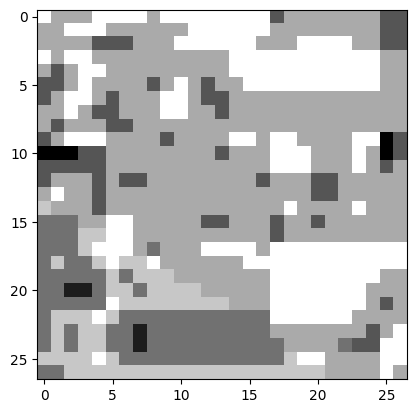

le patch numéro= 68


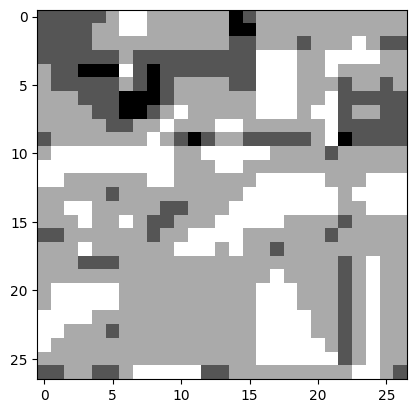

le patch numéro= 69


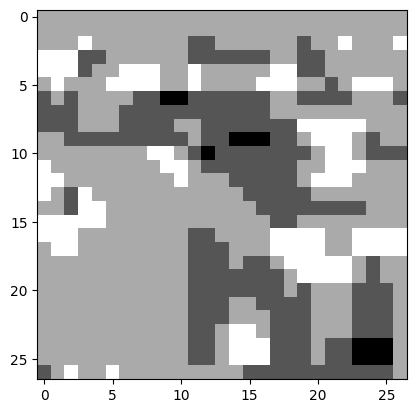

le patch numéro= 70


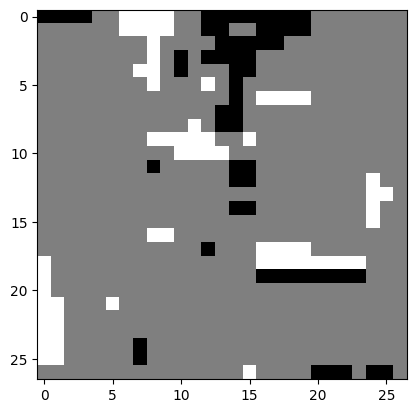

le patch numéro= 71


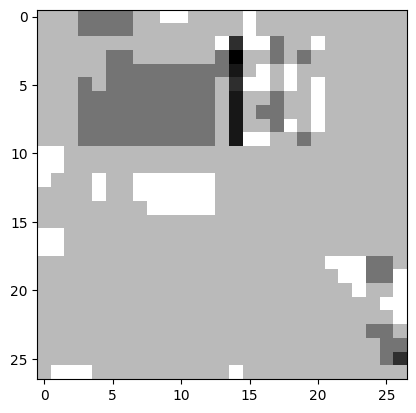

le patch numéro= 72


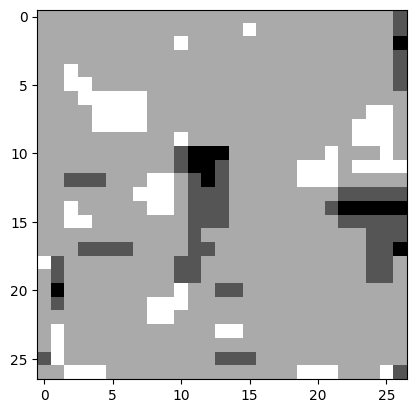

le patch numéro= 73


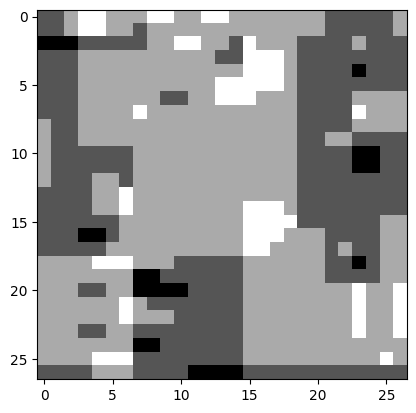

le patch numéro= 74


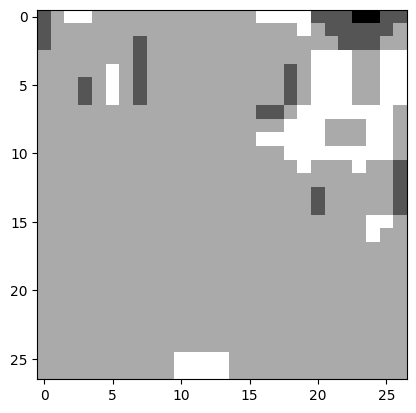

le patch numéro= 75


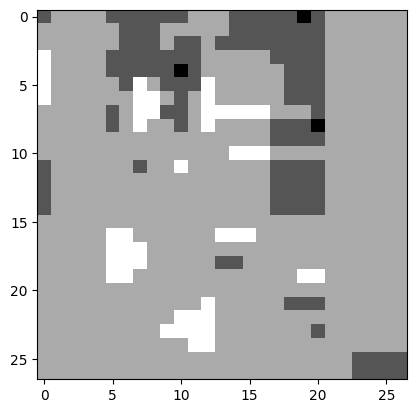

le patch numéro= 76


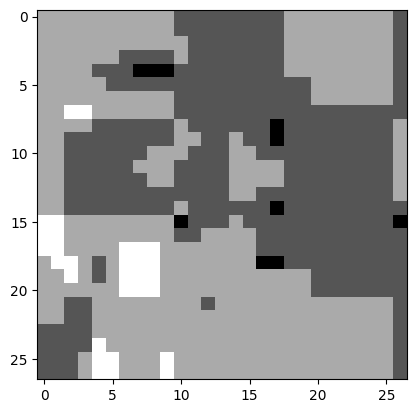

le patch numéro= 77


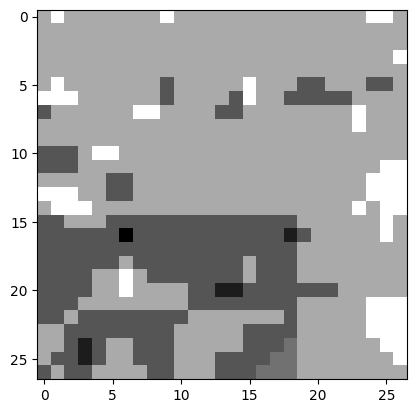

le patch numéro= 78


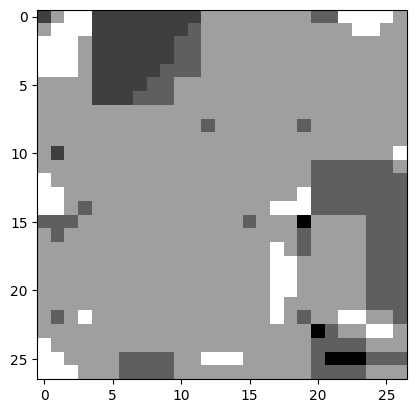

le patch numéro= 79


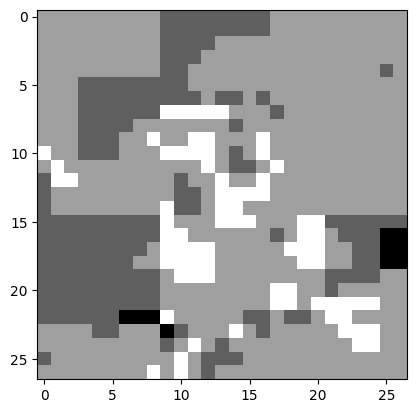

le patch numéro= 80


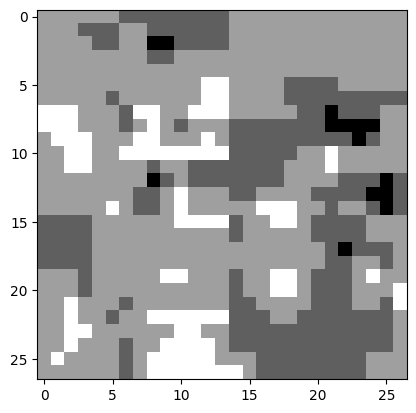

le patch numéro= 81


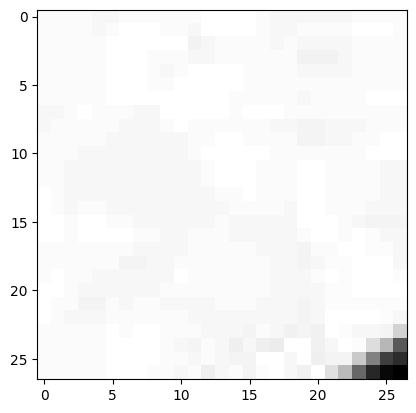

le patch numéro= 82


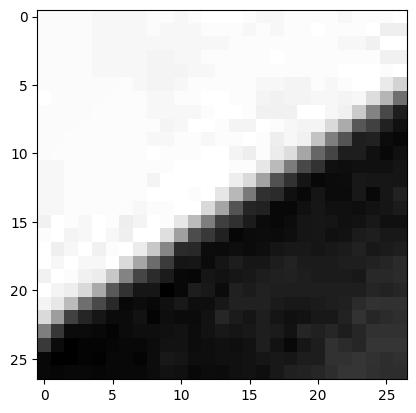

le patch numéro= 83


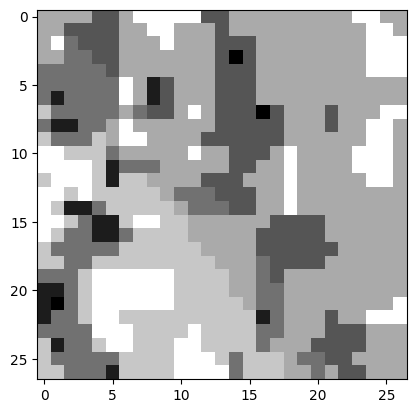

le patch numéro= 84


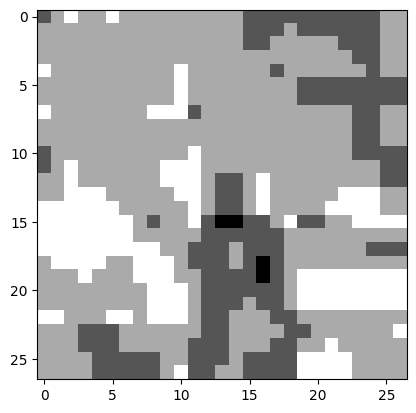

le patch numéro= 85


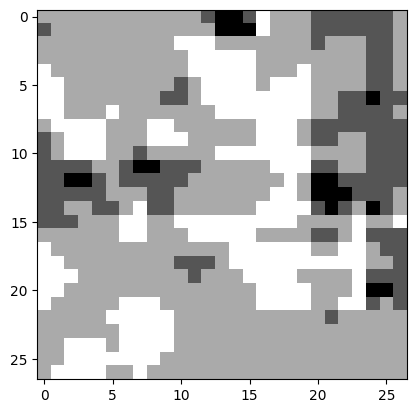

le patch numéro= 86


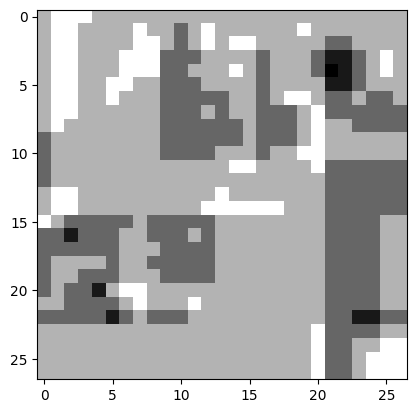

le patch numéro= 87


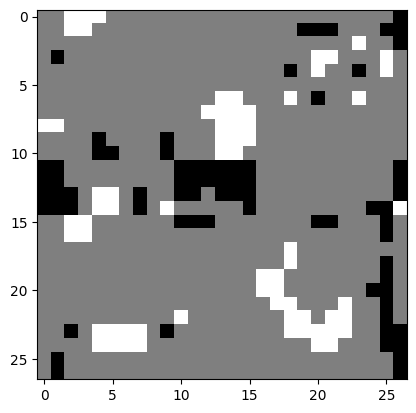

le patch numéro= 88


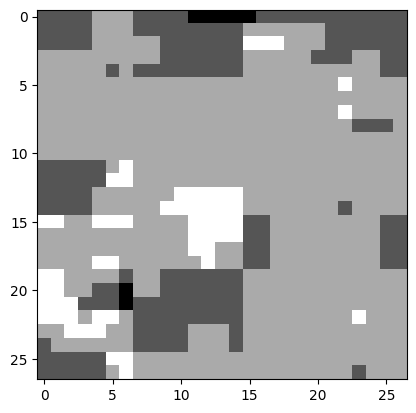

le patch numéro= 89


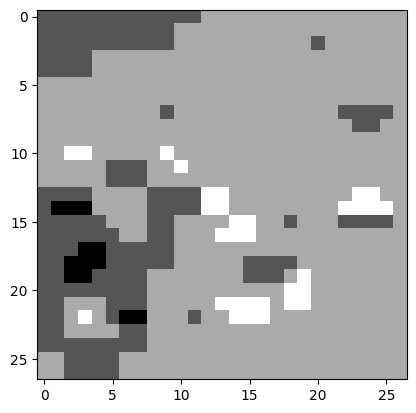

le patch numéro= 90


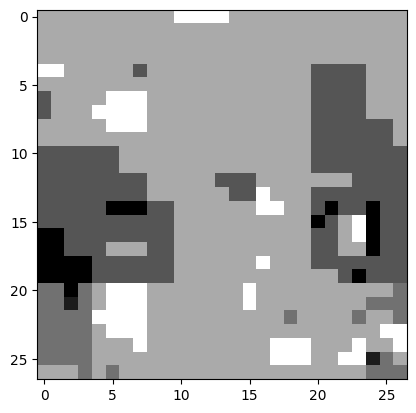

le patch numéro= 91


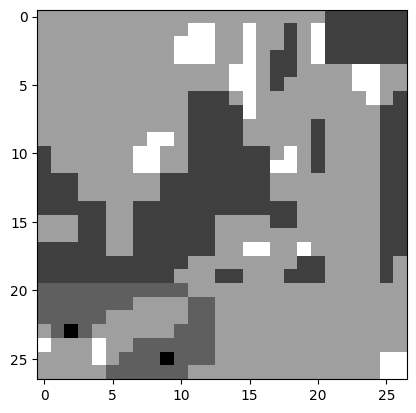

le patch numéro= 92


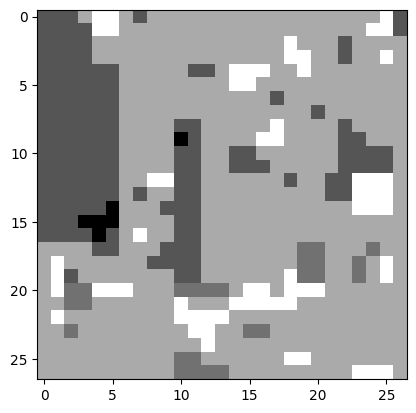

le patch numéro= 93


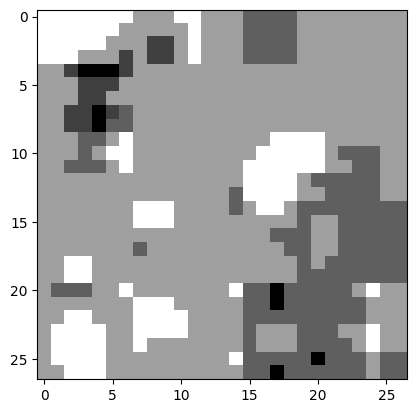

le patch numéro= 94


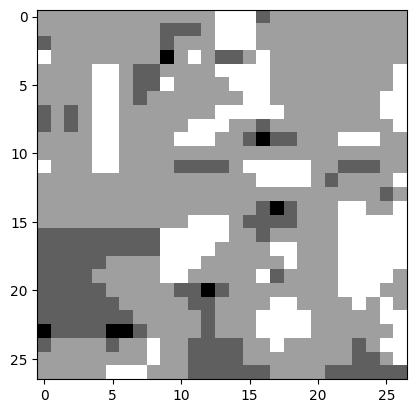

le patch numéro= 95


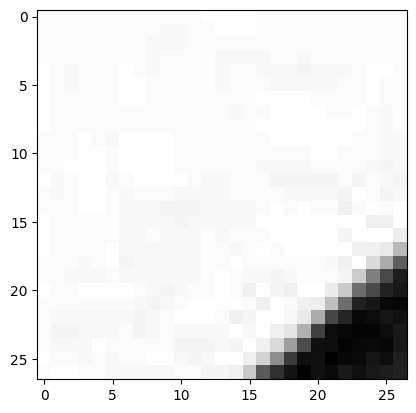

le patch numéro= 96


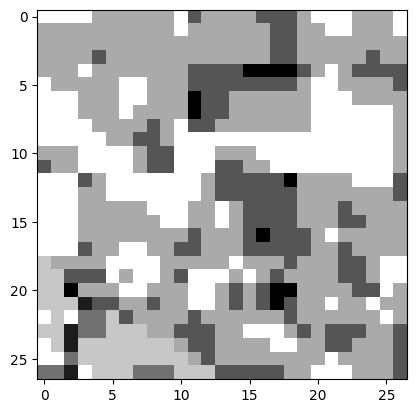

le patch numéro= 97


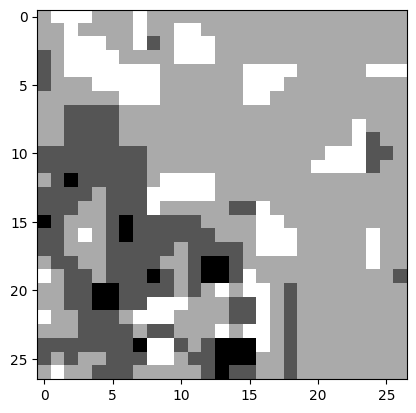

le patch numéro= 98


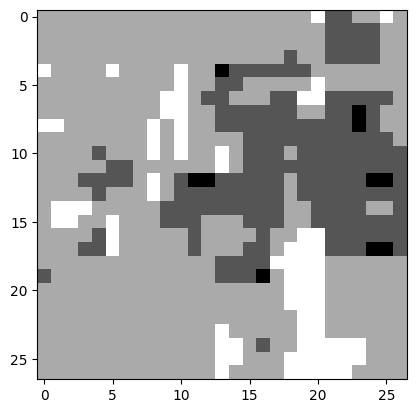

le patch numéro= 99


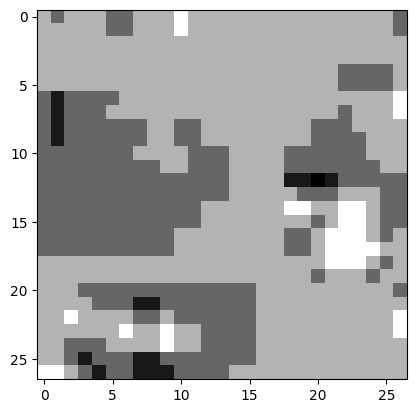

le patch numéro= 100


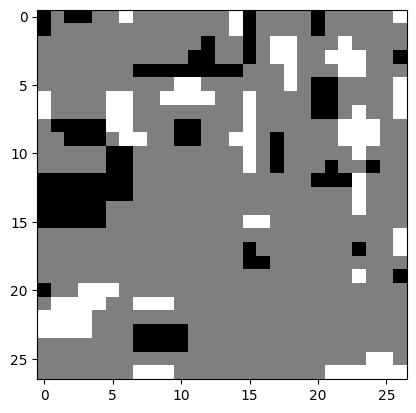

le patch numéro= 101


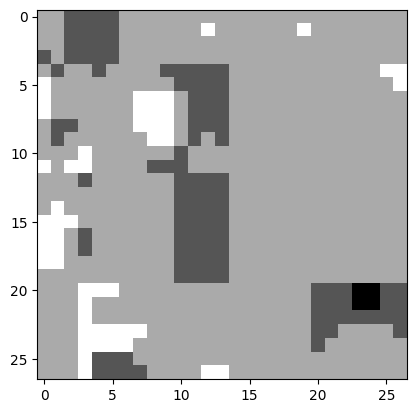

le patch numéro= 102


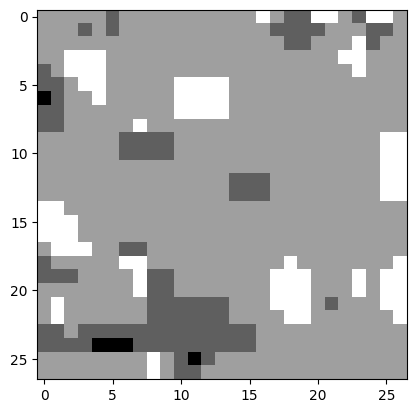

le patch numéro= 103


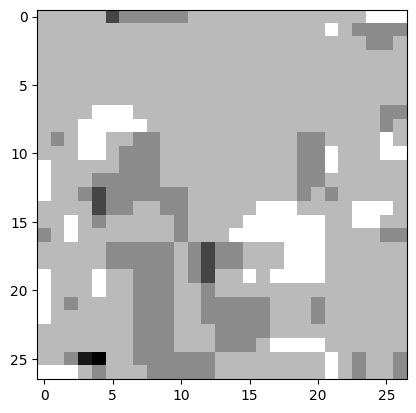

le patch numéro= 104


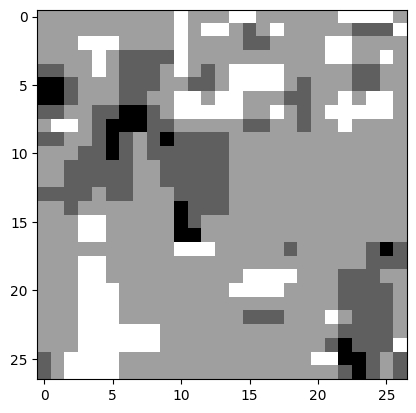

le patch numéro= 105


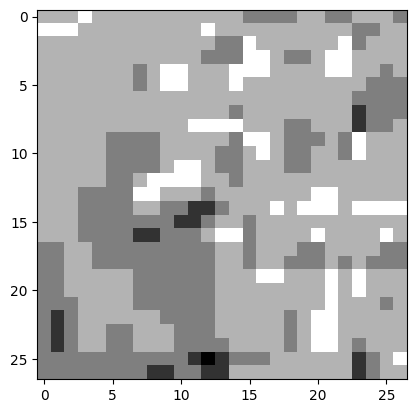

le patch numéro= 106


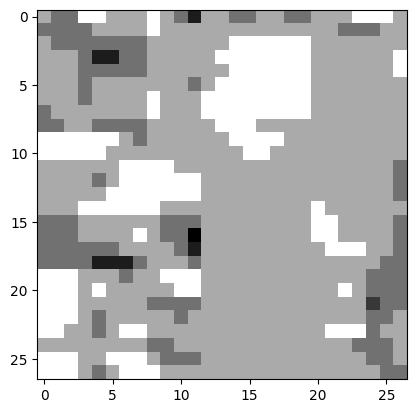

le patch numéro= 107


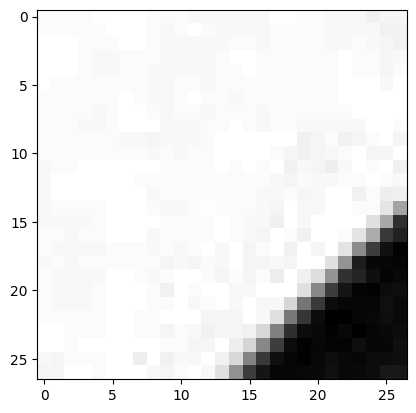

le patch numéro= 108


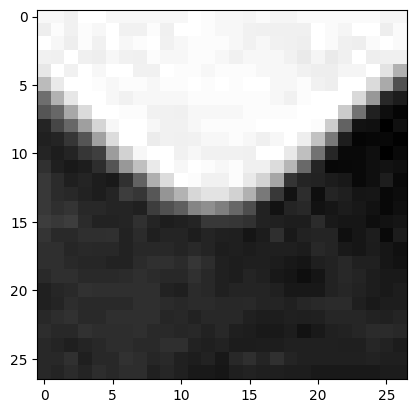

le patch numéro= 109


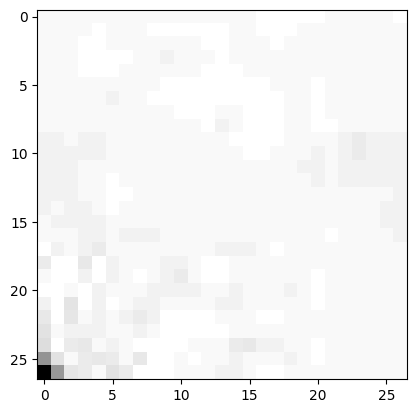

le patch numéro= 110


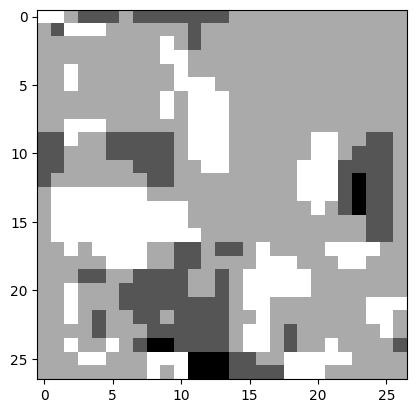

le patch numéro= 111


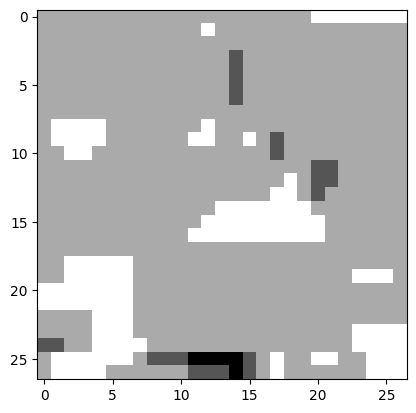

le patch numéro= 112


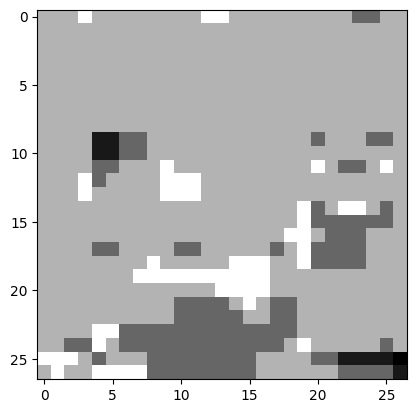

le patch numéro= 113


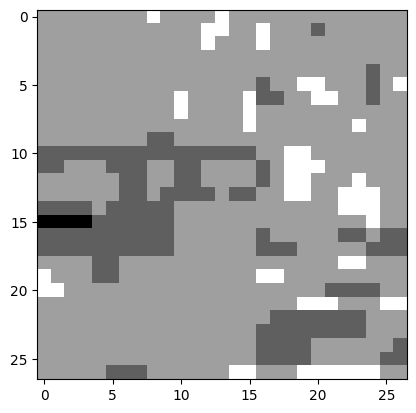

le patch numéro= 114


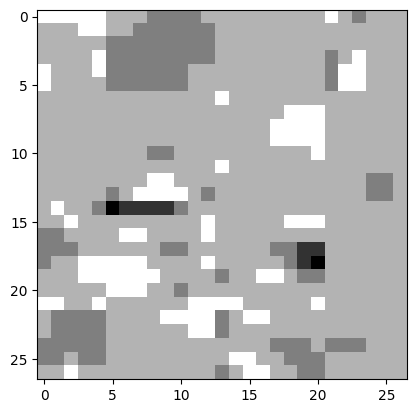

le patch numéro= 115


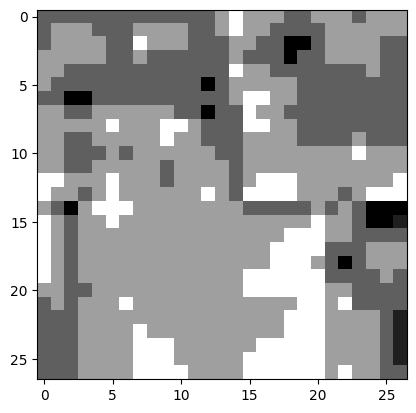

le patch numéro= 116


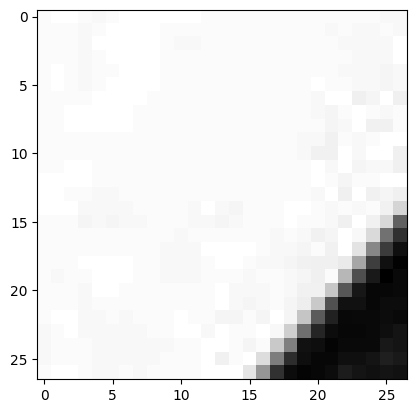

le patch numéro= 117


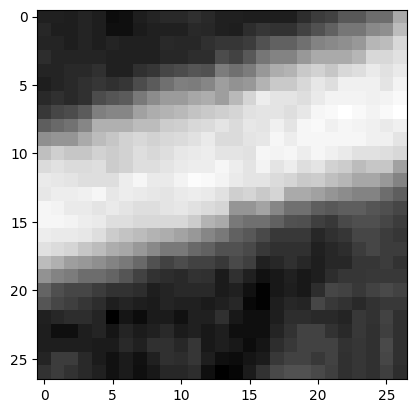

le patch numéro= 118


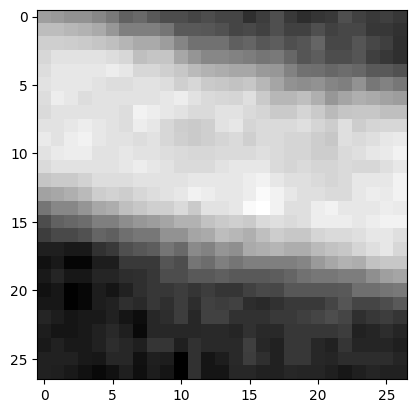

le patch numéro= 119


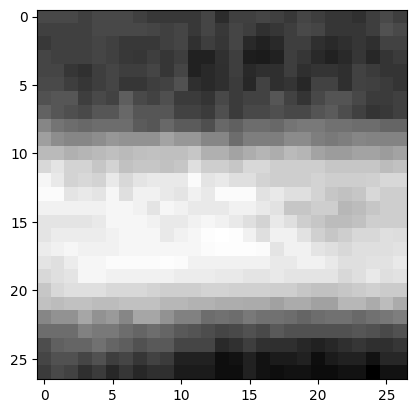

le patch numéro= 120


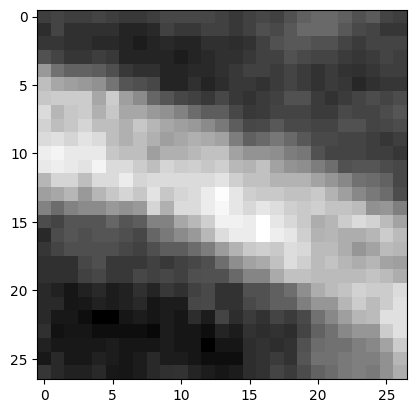

le patch numéro= 121


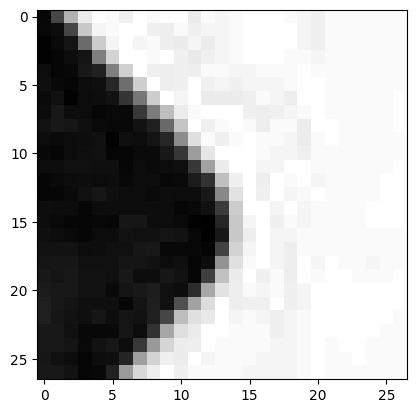

le patch numéro= 122


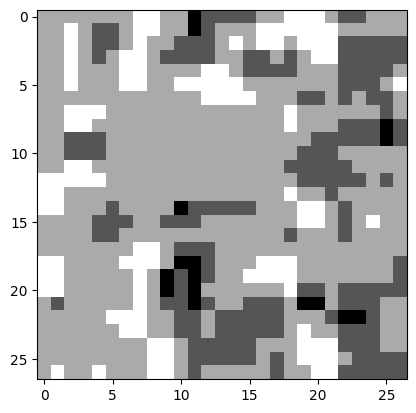

le patch numéro= 123


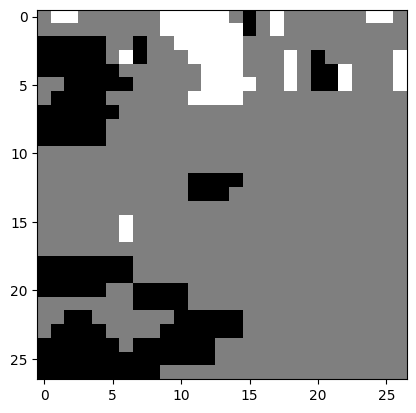

le patch numéro= 124


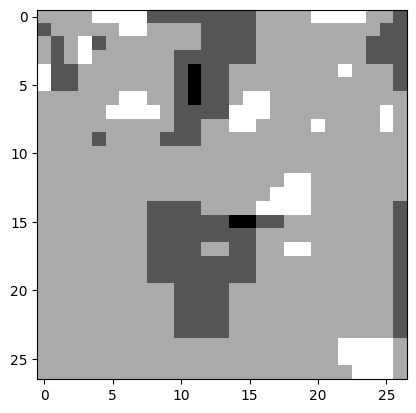

le patch numéro= 125


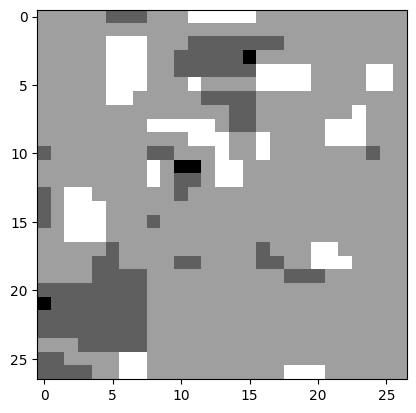

le patch numéro= 126


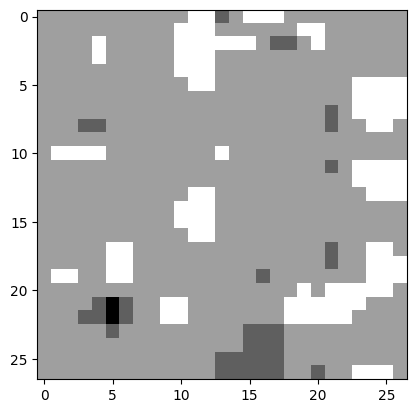

le patch numéro= 127


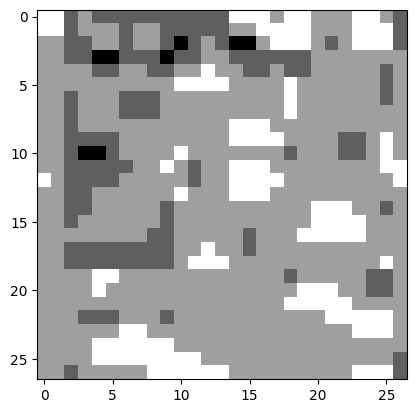

le patch numéro= 128


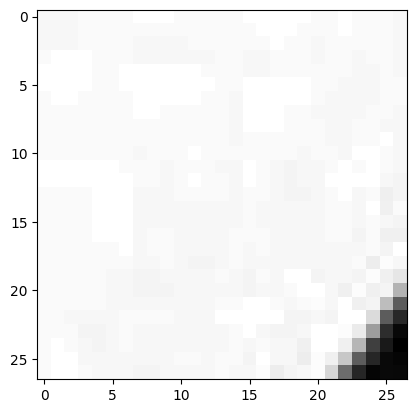

le patch numéro= 129


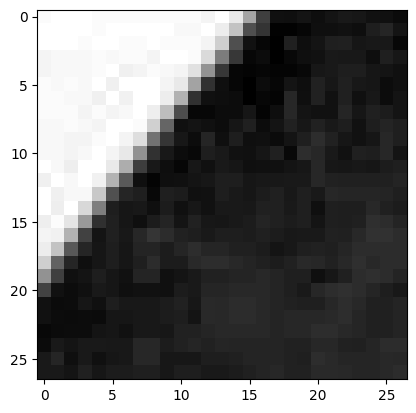

le patch numéro= 130


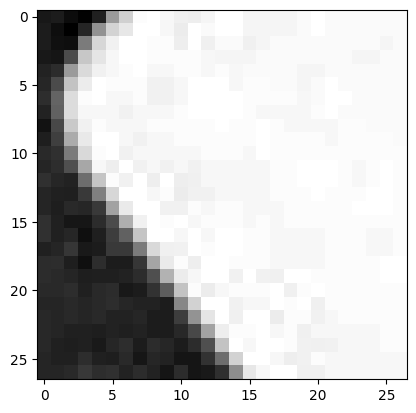

le patch numéro= 131


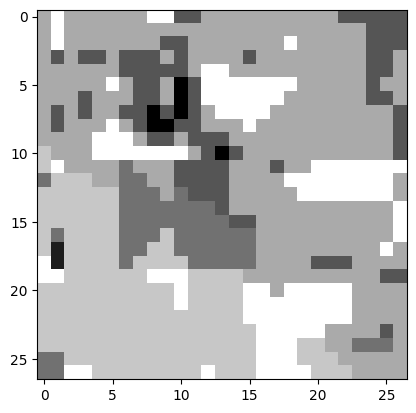

le patch numéro= 132


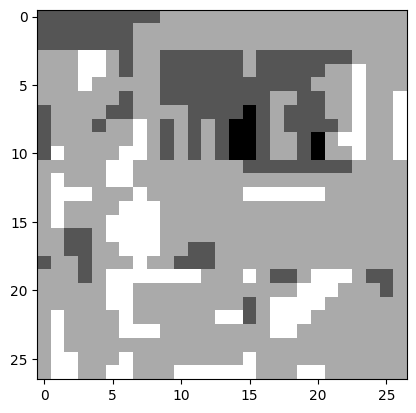

le patch numéro= 133


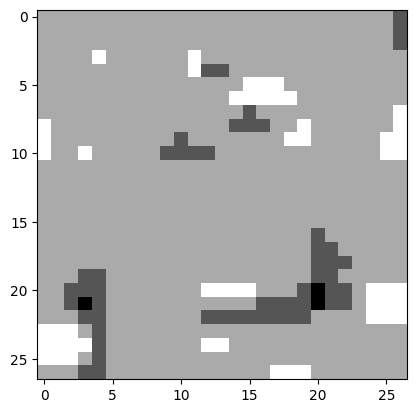

le patch numéro= 134


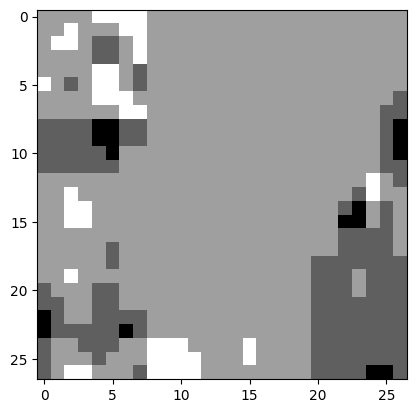

le patch numéro= 135


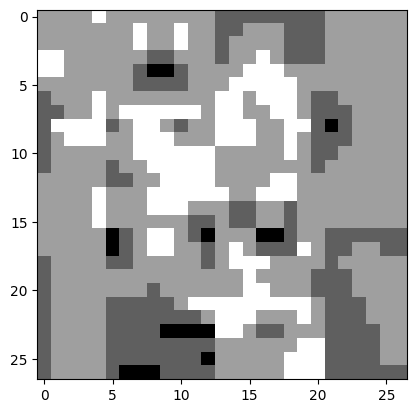

le patch numéro= 136


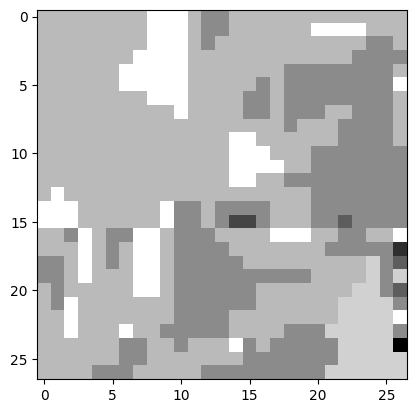

le patch numéro= 137


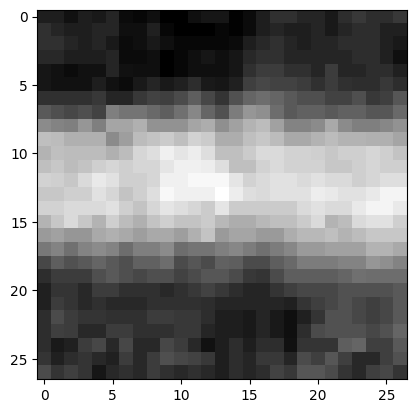

le patch numéro= 138


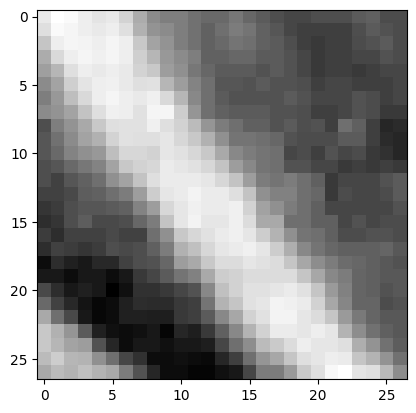

le patch numéro= 139


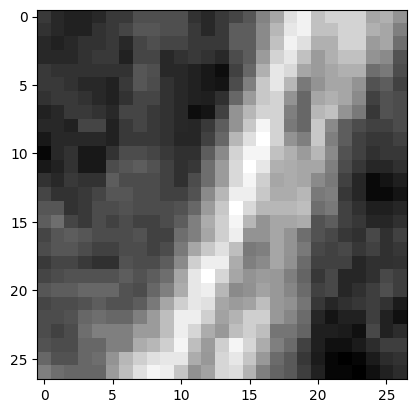

le patch numéro= 140


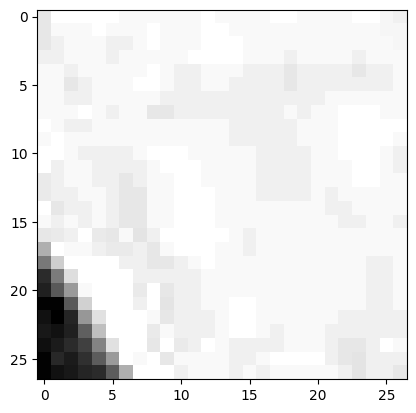

le patch numéro= 141


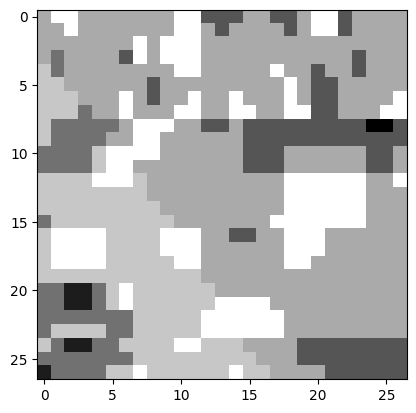

le patch numéro= 142


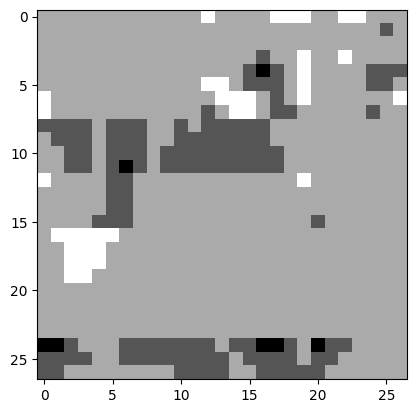

le patch numéro= 143


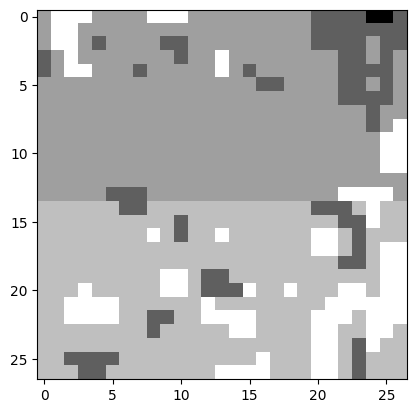

le patch numéro= 144


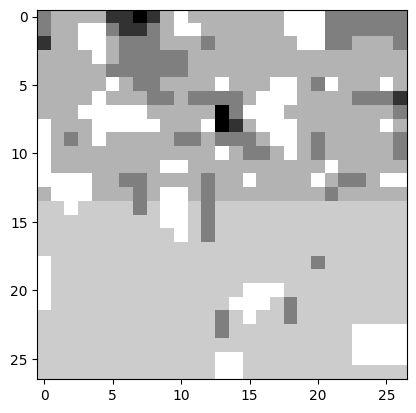

le patch numéro= 145


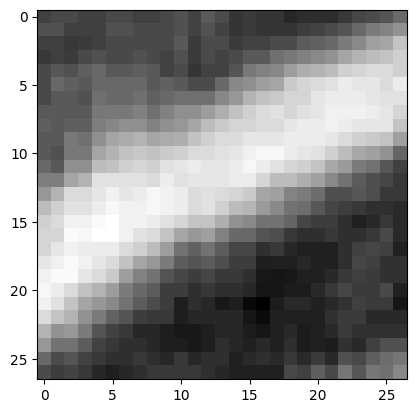

le patch numéro= 146


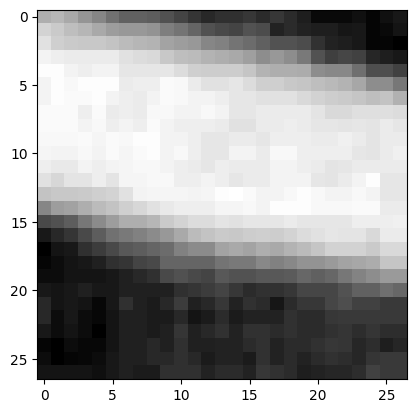

le patch numéro= 147


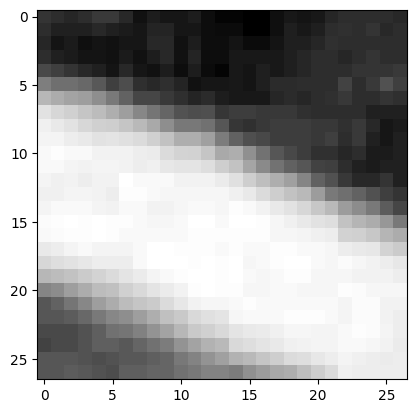

le patch numéro= 148


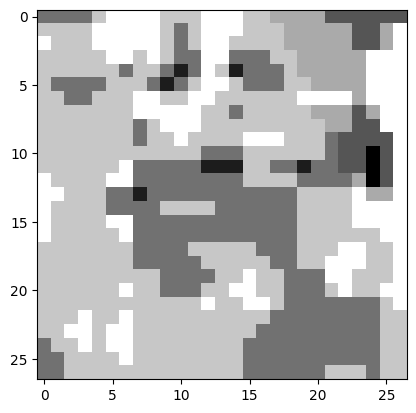

le patch numéro= 149


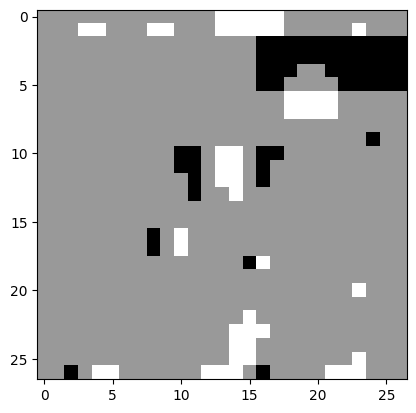

le patch numéro= 150


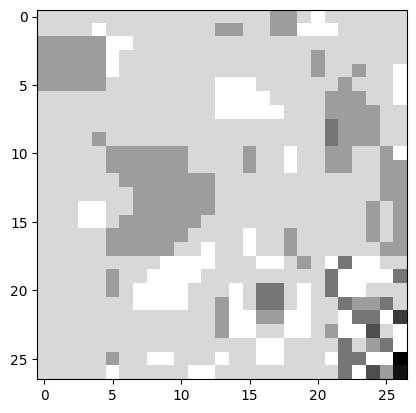

le patch numéro= 151


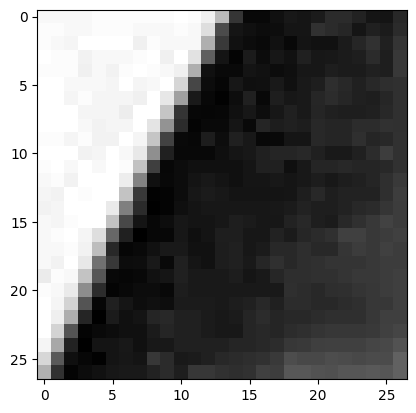

le patch numéro= 152


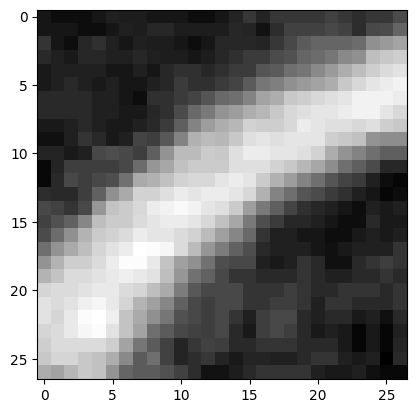

le patch numéro= 153


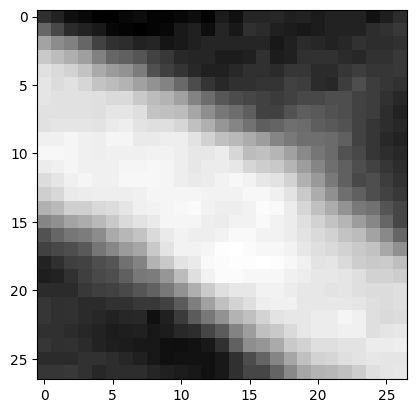

le patch numéro= 154


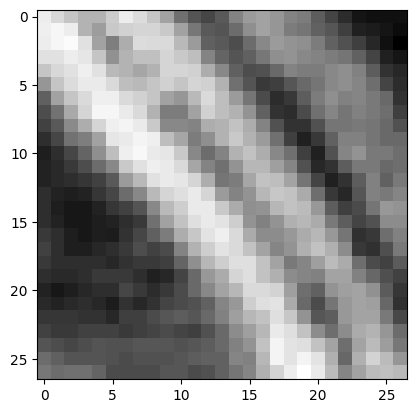

le patch numéro= 155


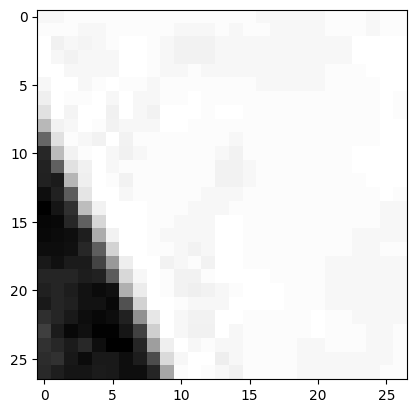

le patch numéro= 156


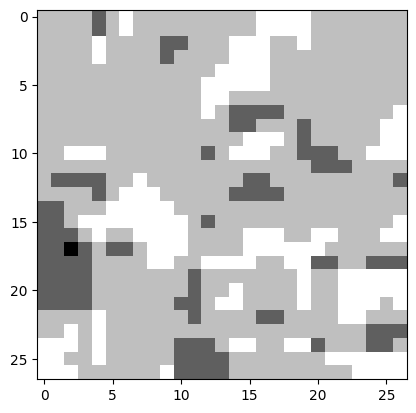

le patch numéro= 157


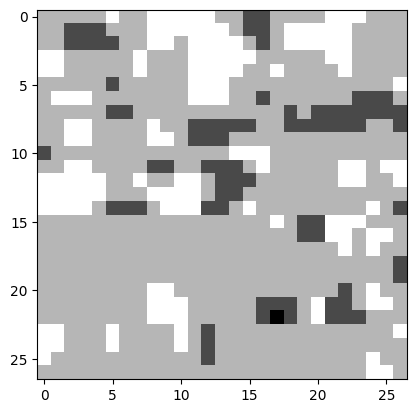

le patch numéro= 158


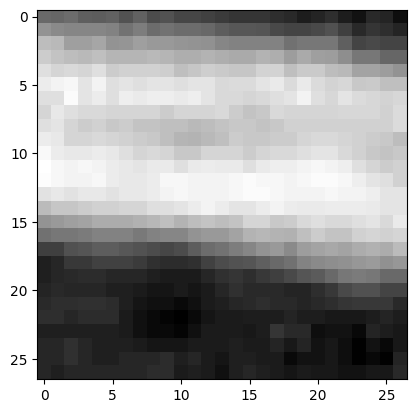

le patch numéro= 159


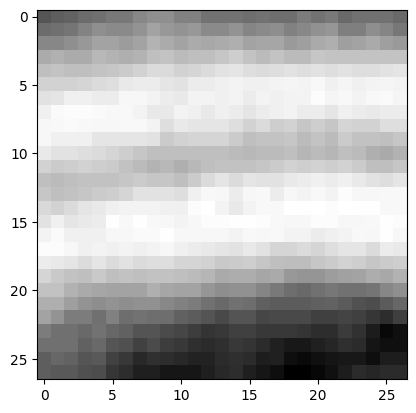

le patch numéro= 160


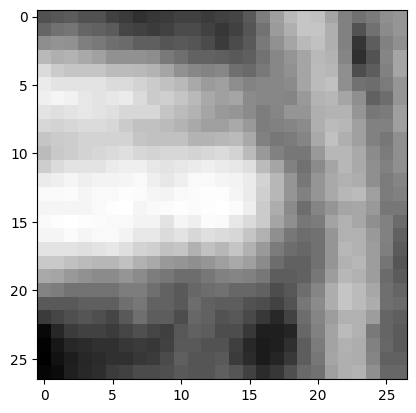

le patch numéro= 161


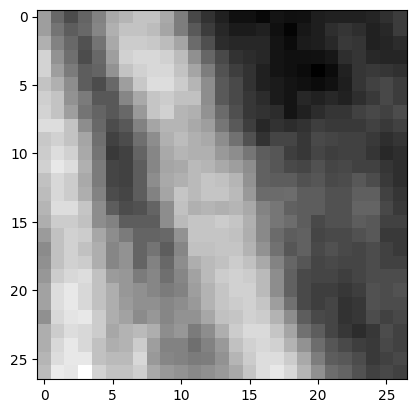

le patch numéro= 162


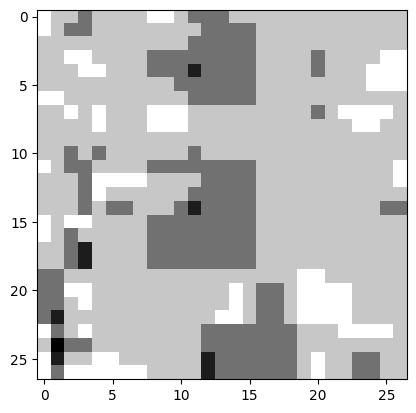

le patch numéro= 163


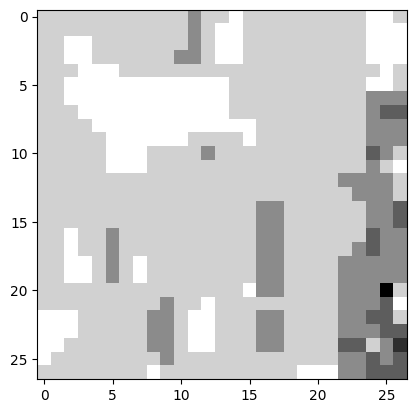

le patch numéro= 164


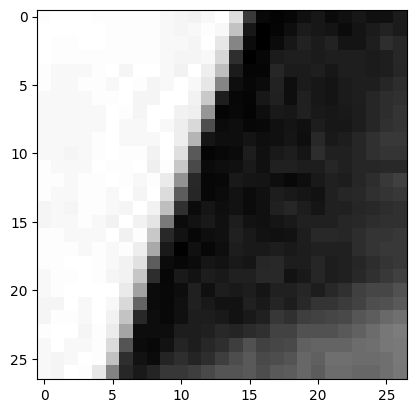

le patch numéro= 165


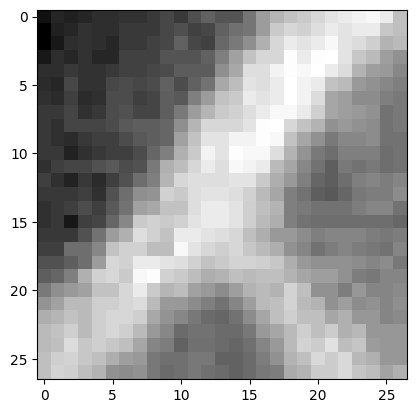

le patch numéro= 166


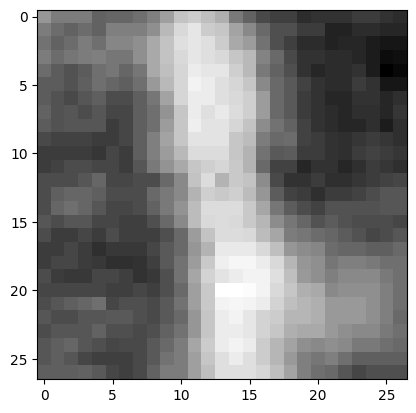

le patch numéro= 167


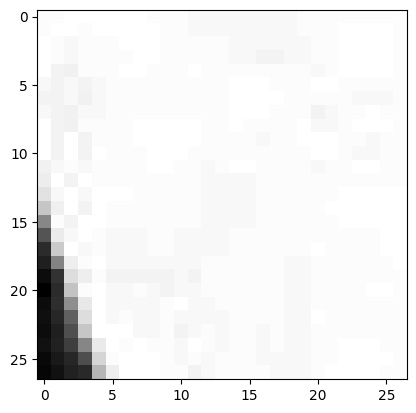

le patch numéro= 168


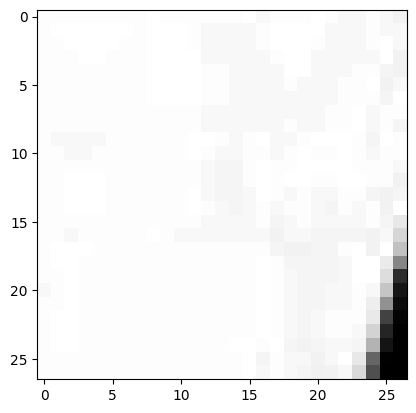

le patch numéro= 169


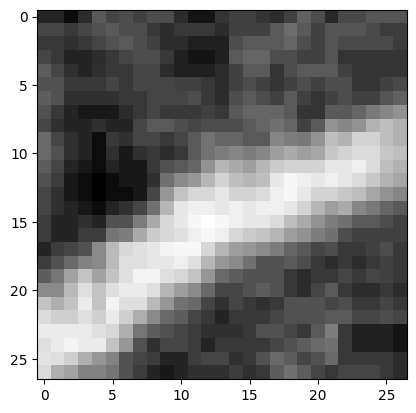

le patch numéro= 170


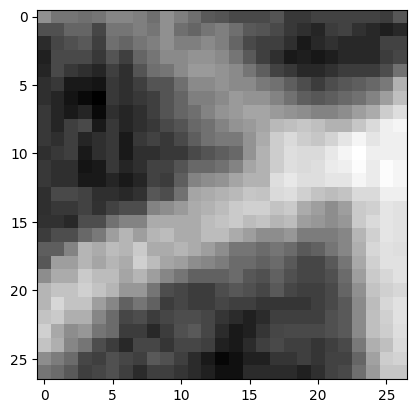

le patch numéro= 171


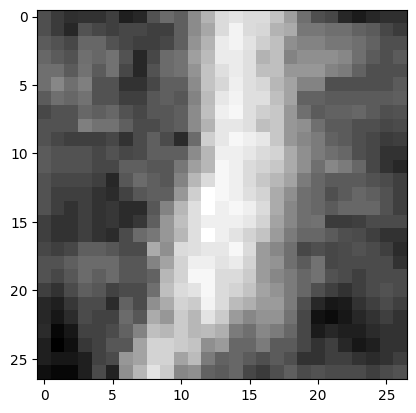

le patch numéro= 172


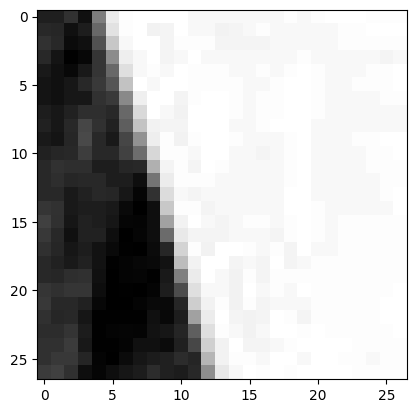

le patch numéro= 173


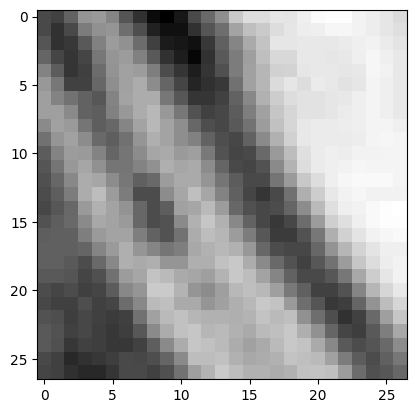

le patch numéro= 174


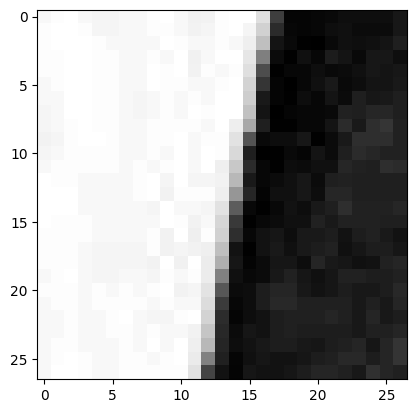

le patch numéro= 175


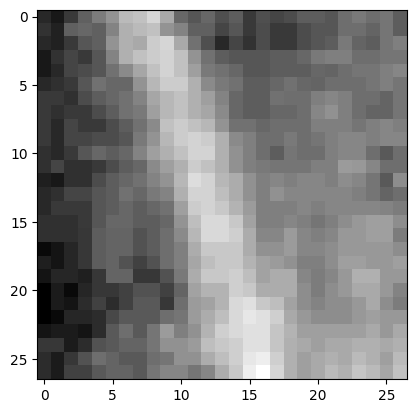

le patch numéro= 176


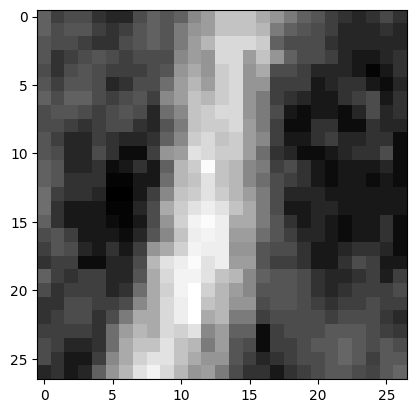

le patch numéro= 177


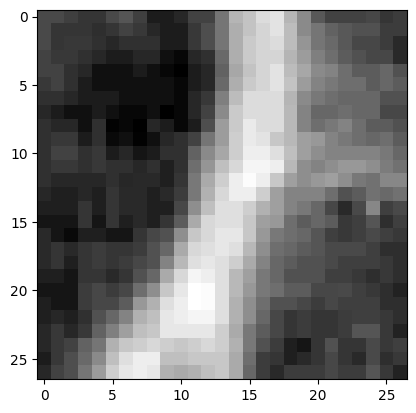

le patch numéro= 178


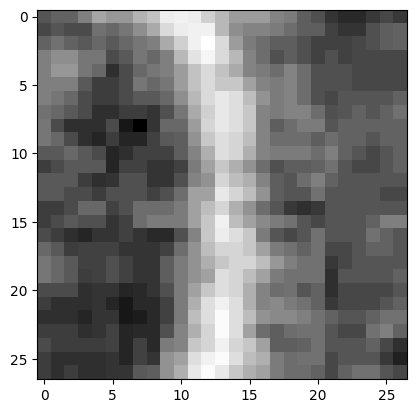

le patch numéro= 179


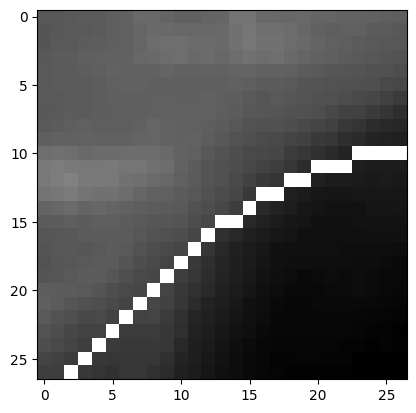

le patch numéro= 180


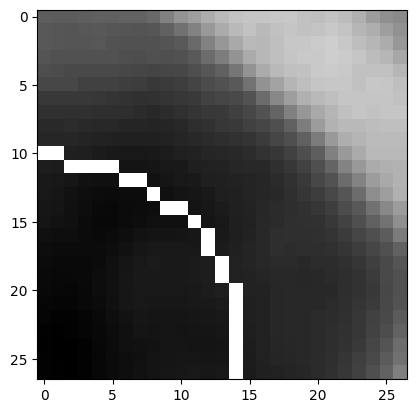

le patch numéro= 181


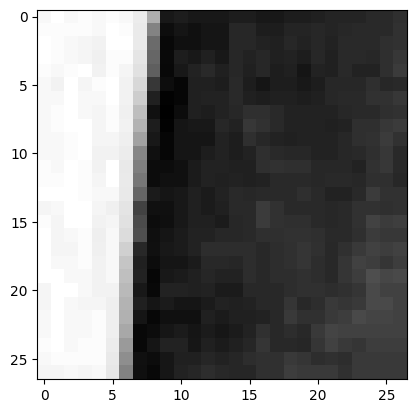

le patch numéro= 182


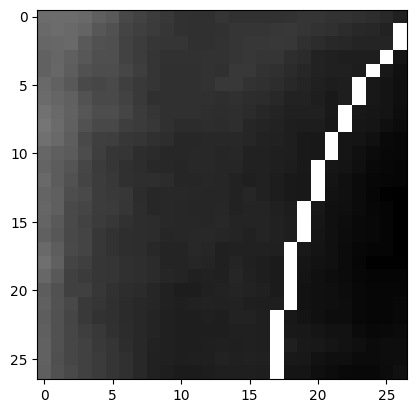

le patch numéro= 183


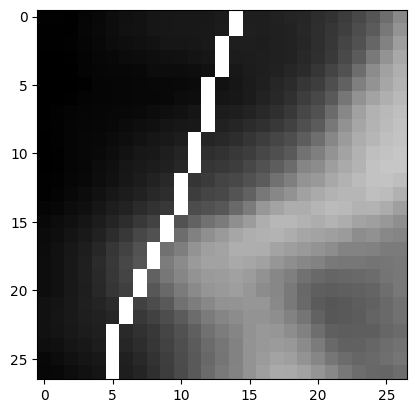

le patch numéro= 184


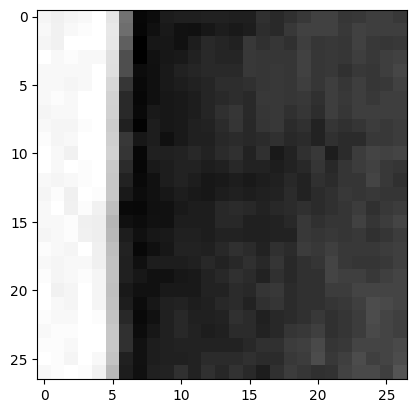

le patch numéro= 185


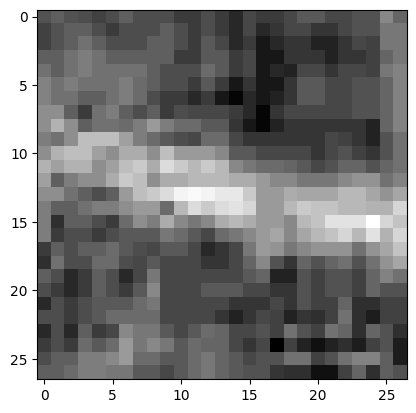

le patch numéro= 186


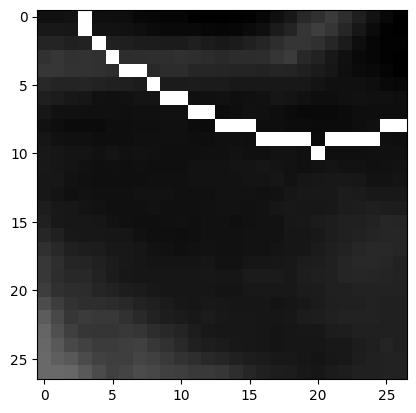

le patch numéro= 187


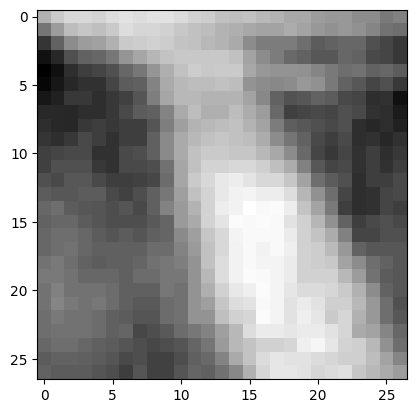

le patch numéro= 188


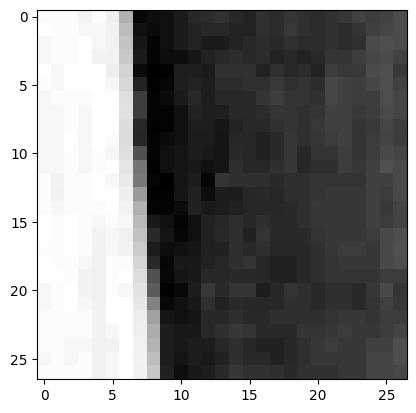

le patch numéro= 189


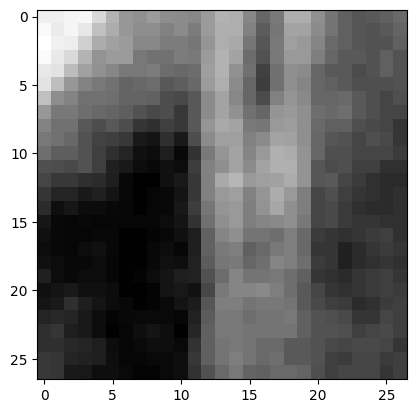

le patch numéro= 190


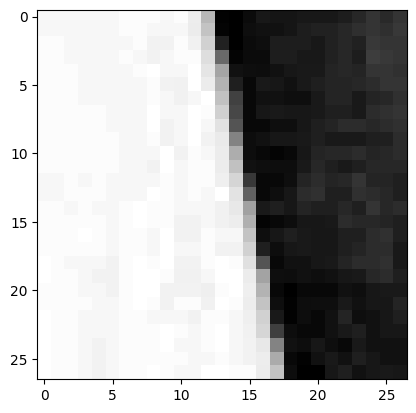

le patch numéro= 191


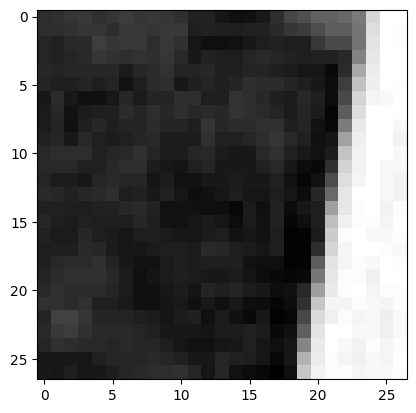

le patch numéro= 192


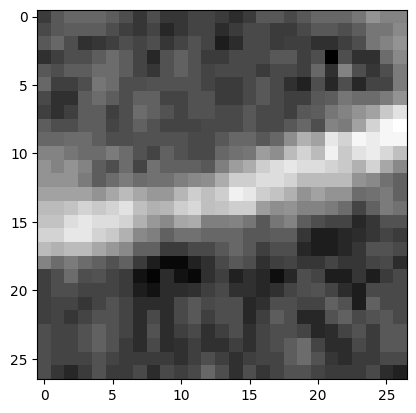

le patch numéro= 193


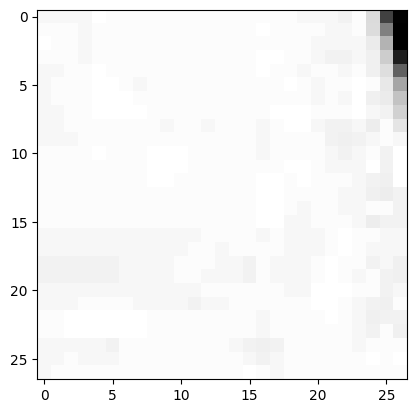

le patch numéro= 194


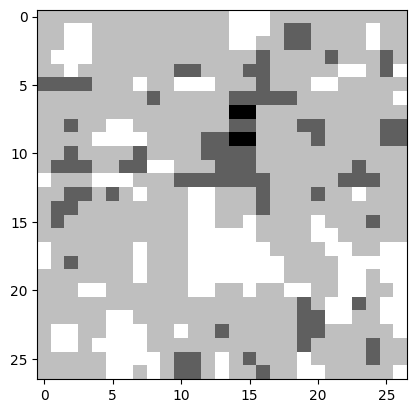

le patch numéro= 195


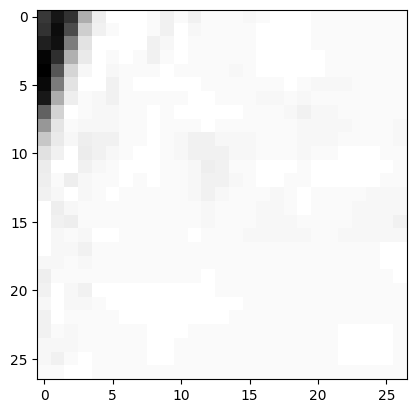

le patch numéro= 196


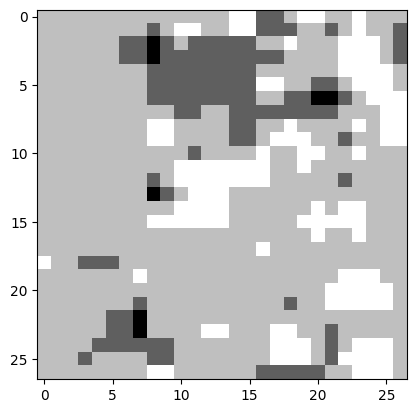

le patch numéro= 197


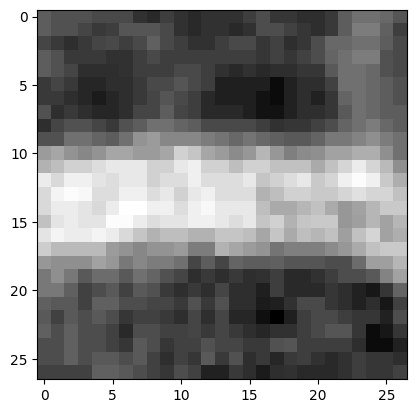

le patch numéro= 198


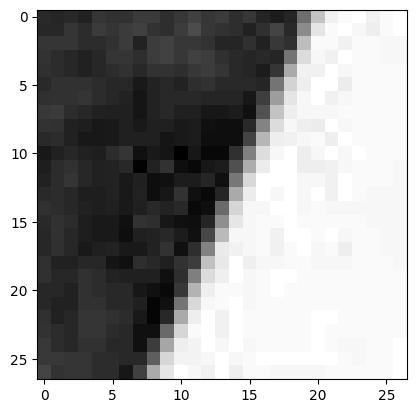

le patch numéro= 199


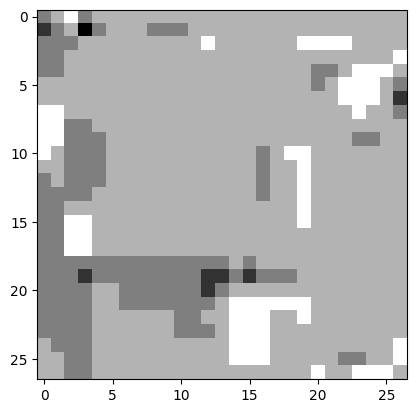

le patch numéro= 200


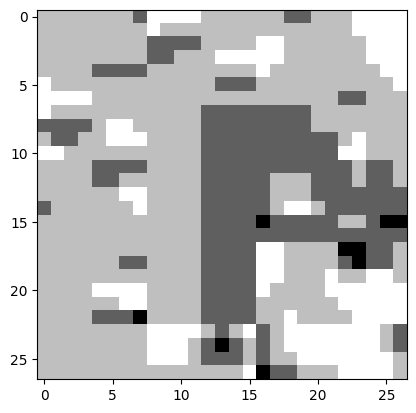

le patch numéro= 201


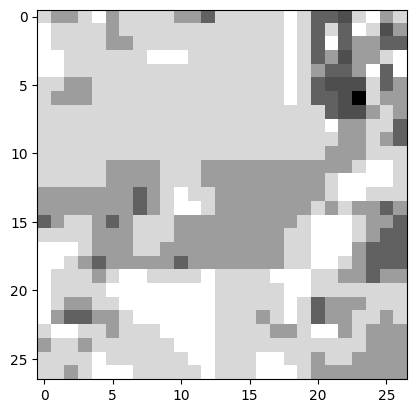

le patch numéro= 202


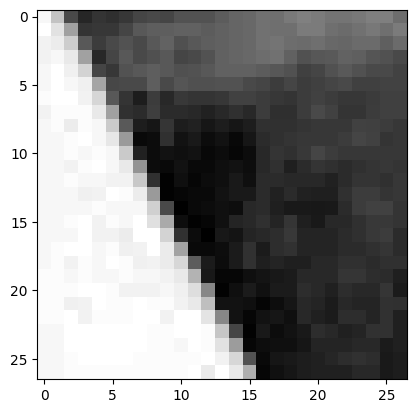

le patch numéro= 203


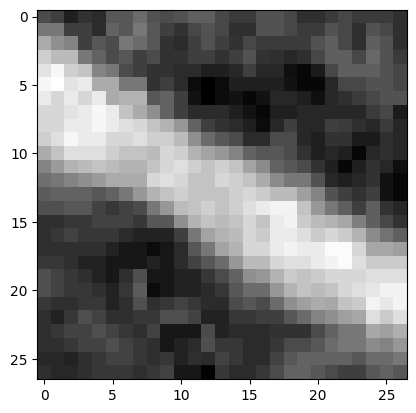

le patch numéro= 204


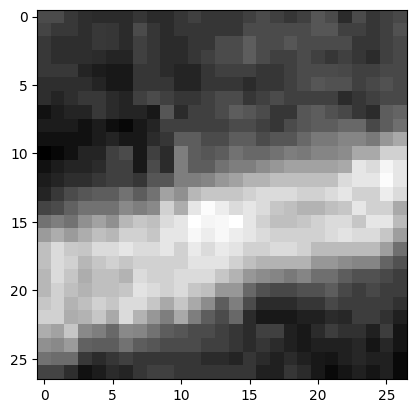

le patch numéro= 205


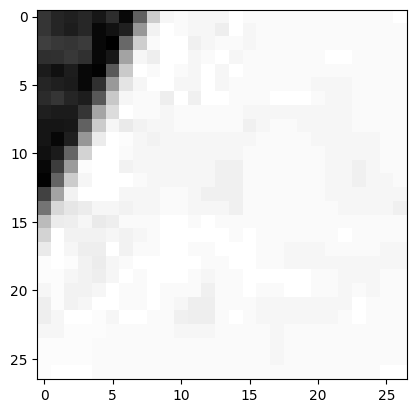

le patch numéro= 206


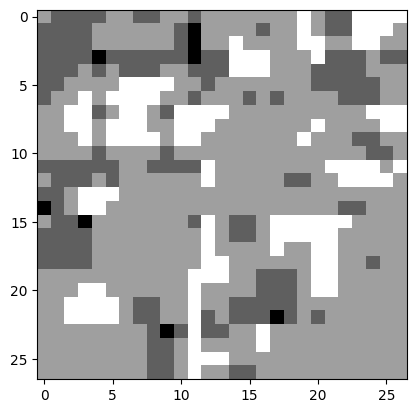

le patch numéro= 207


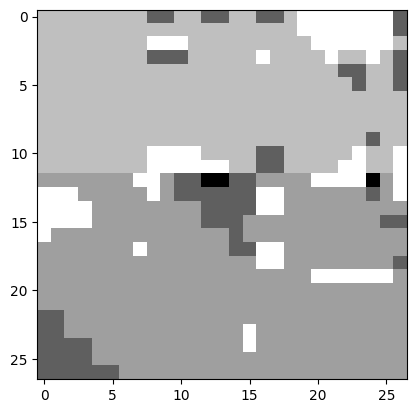

le patch numéro= 208


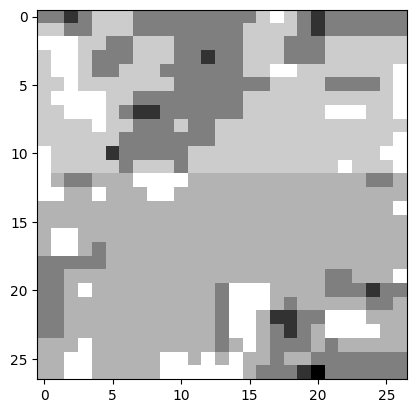

le patch numéro= 209


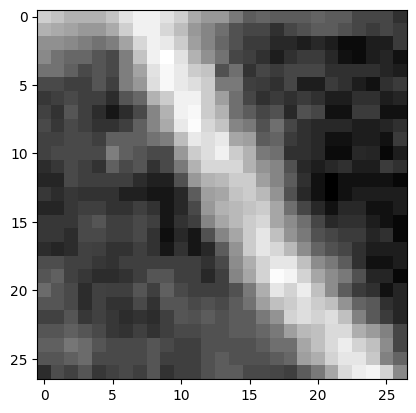

le patch numéro= 210


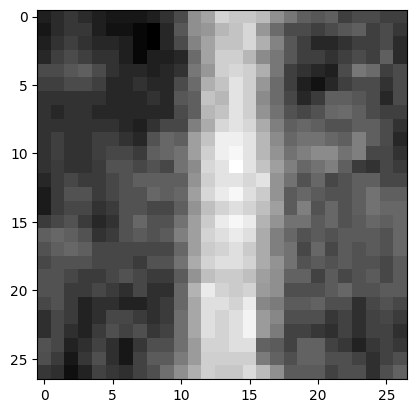

le patch numéro= 211


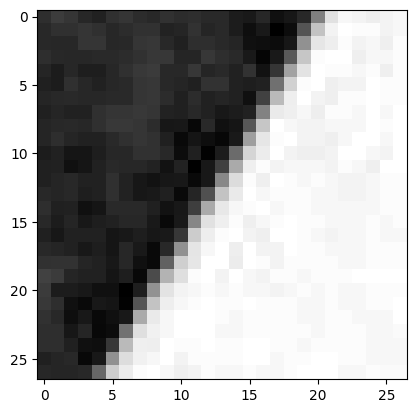

le patch numéro= 212


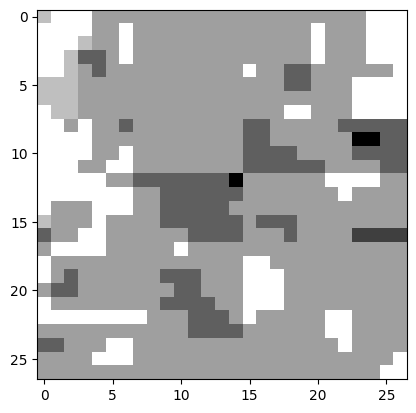

le patch numéro= 213


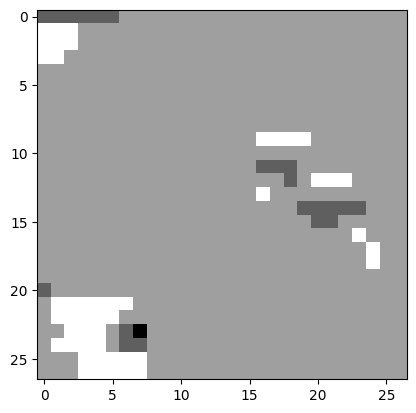

le patch numéro= 214


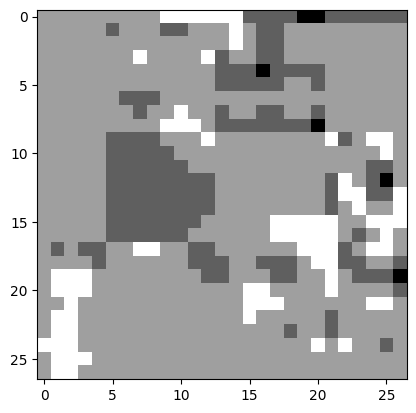

le patch numéro= 215


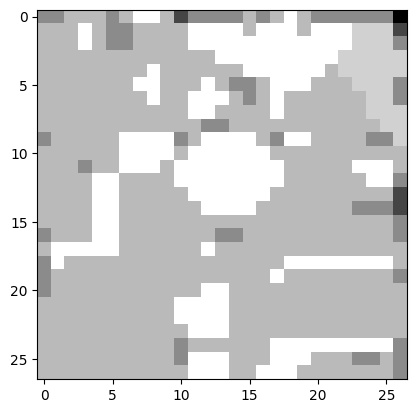

le patch numéro= 216


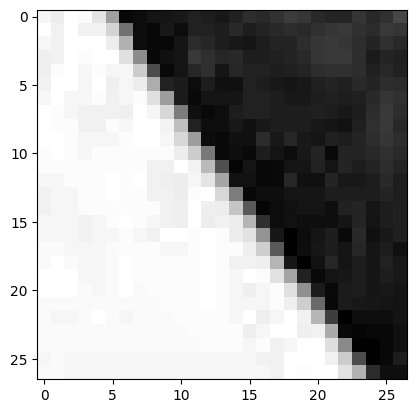

le patch numéro= 217


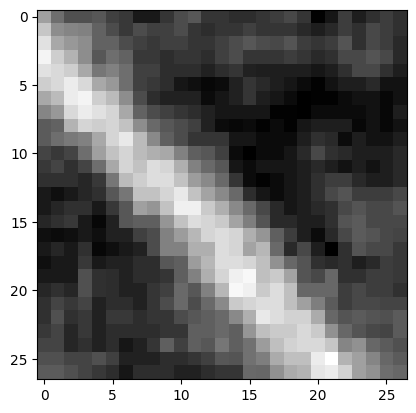

le patch numéro= 218


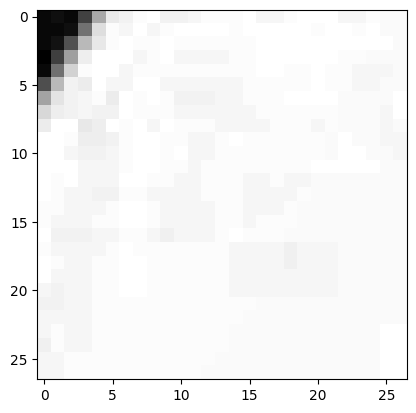

le patch numéro= 219


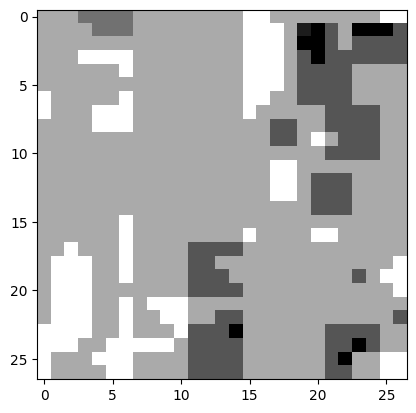

le patch numéro= 220


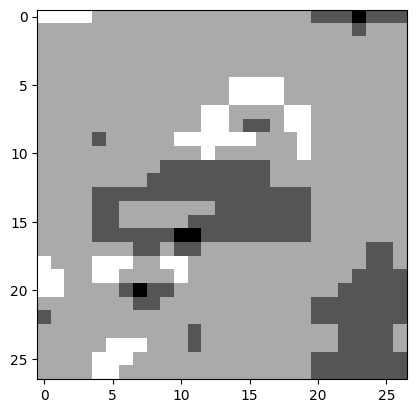

le patch numéro= 221


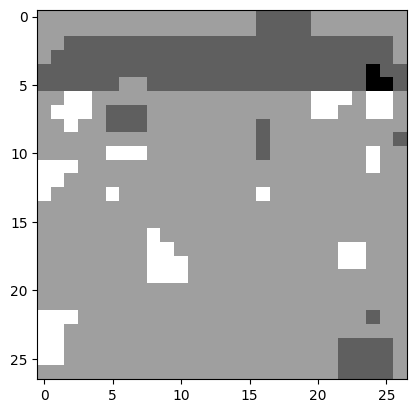

le patch numéro= 222


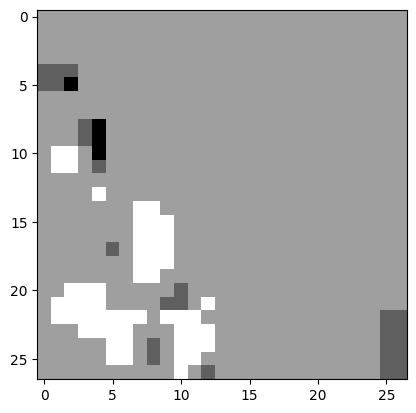

le patch numéro= 223


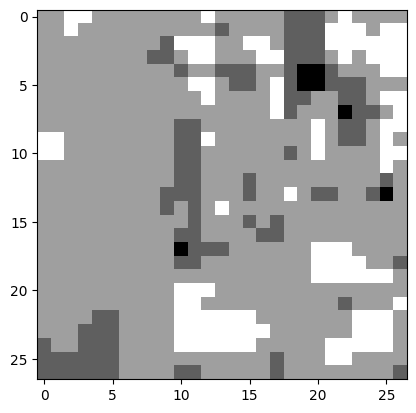

le patch numéro= 224


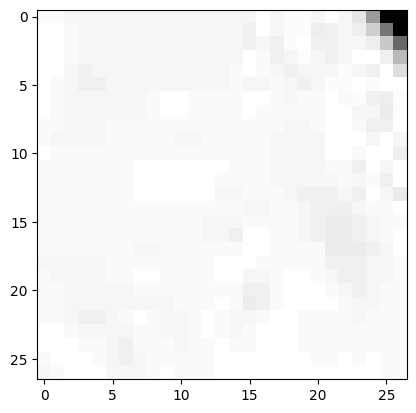

le patch numéro= 225


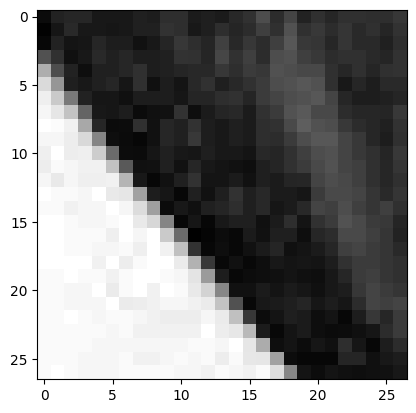

le patch numéro= 226


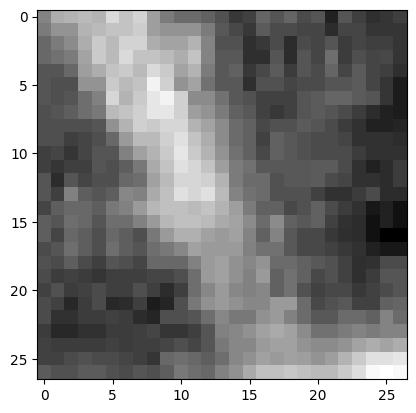

le patch numéro= 227


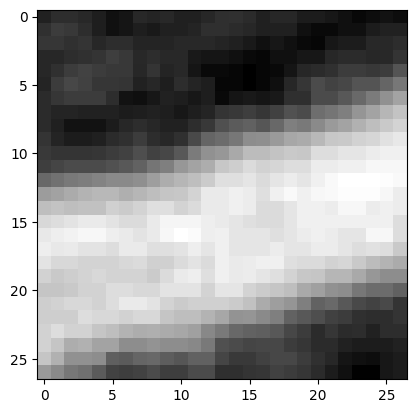

le patch numéro= 228


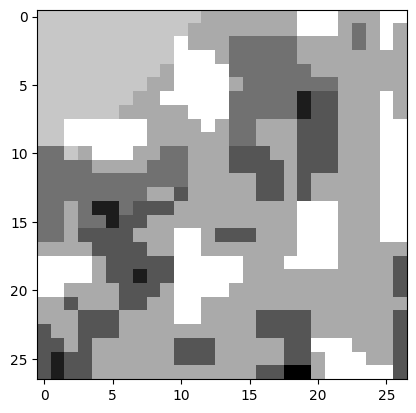

le patch numéro= 229


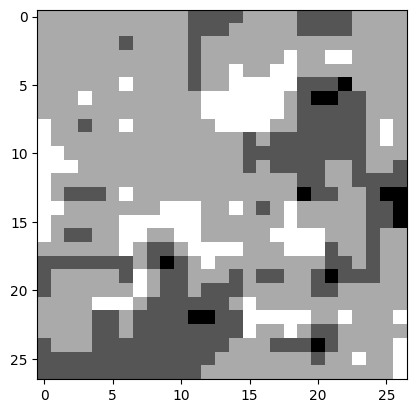

le patch numéro= 230


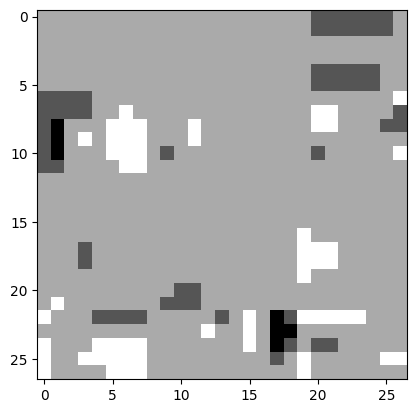

le patch numéro= 231


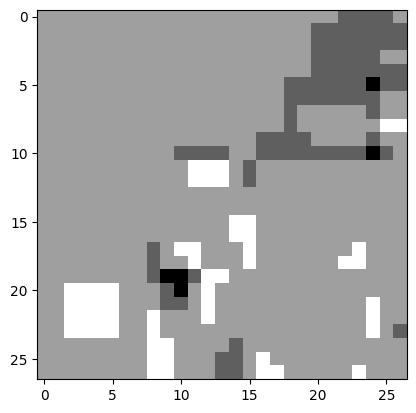

le patch numéro= 232


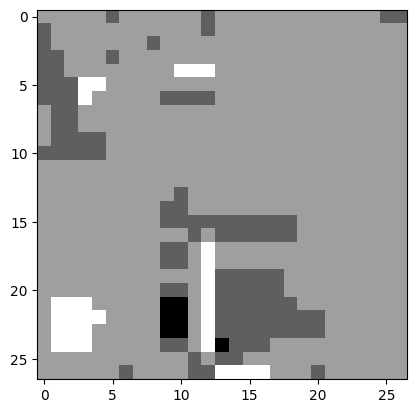

le patch numéro= 233


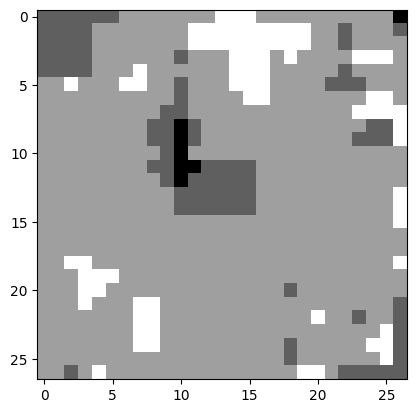

le patch numéro= 234


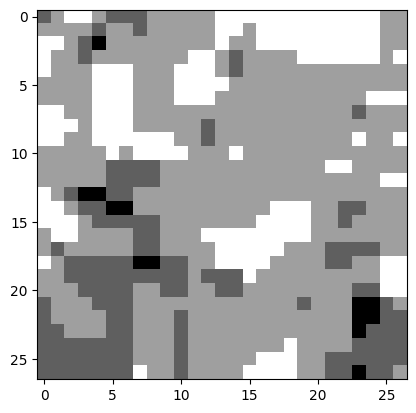

le patch numéro= 235


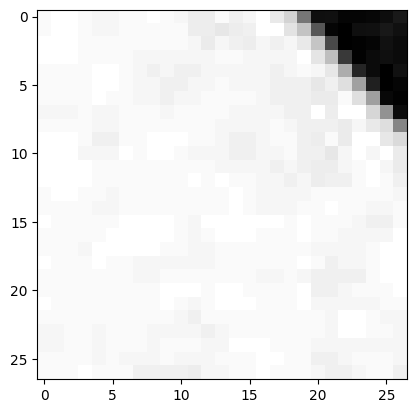

le patch numéro= 236


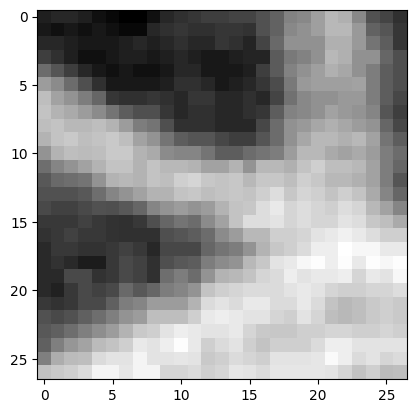

le patch numéro= 237


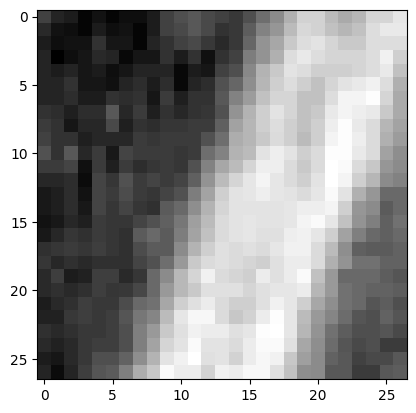

le patch numéro= 238


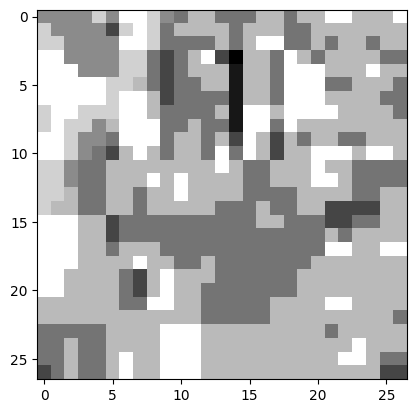

le patch numéro= 239


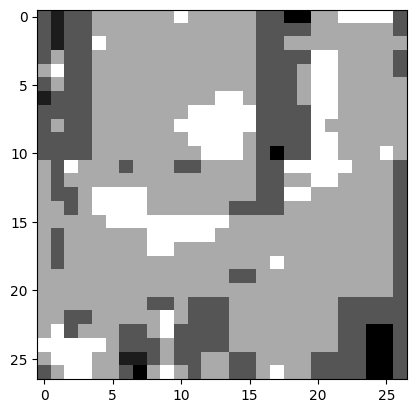

le patch numéro= 240


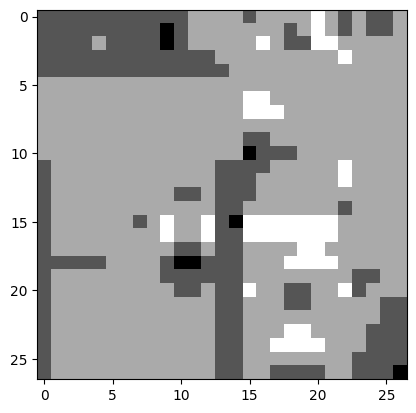

le patch numéro= 241


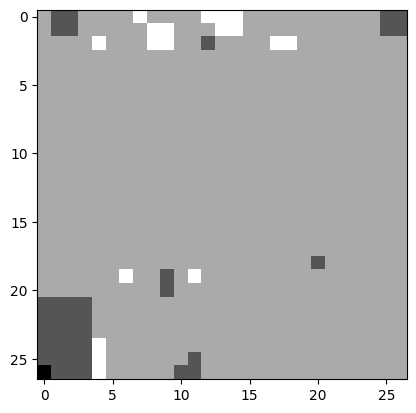

le patch numéro= 242


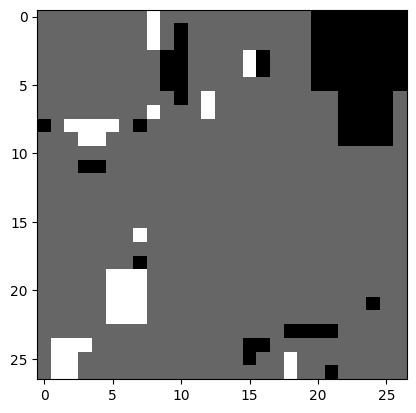

le patch numéro= 243


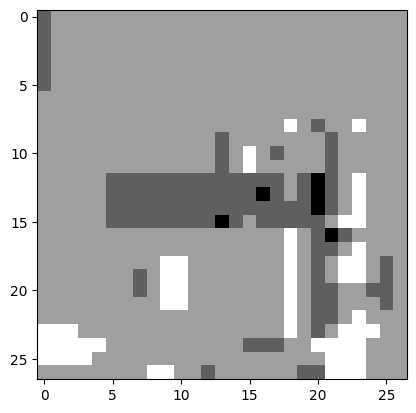

le patch numéro= 244


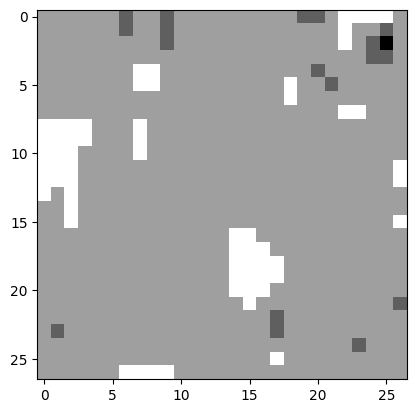

le patch numéro= 245


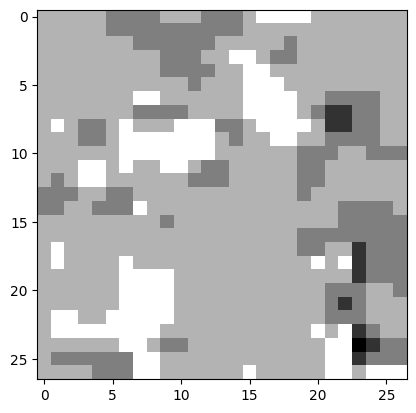

le patch numéro= 246


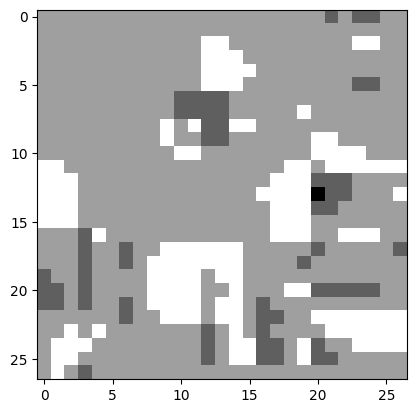

le patch numéro= 247


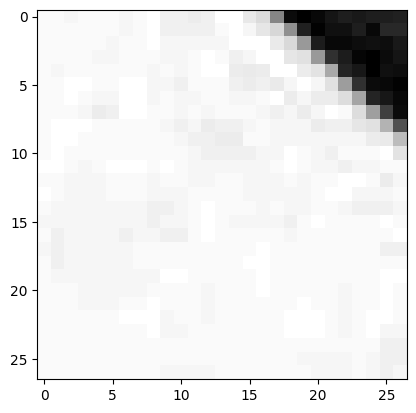

le patch numéro= 248


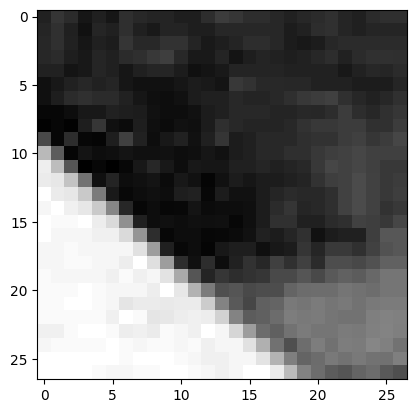

le patch numéro= 249


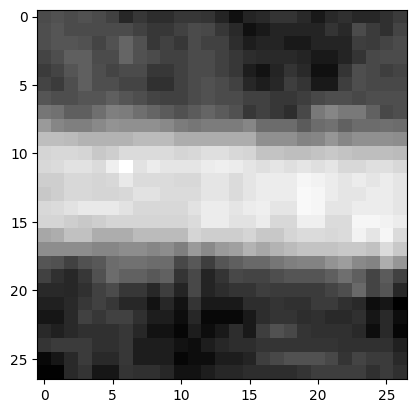

le patch numéro= 250


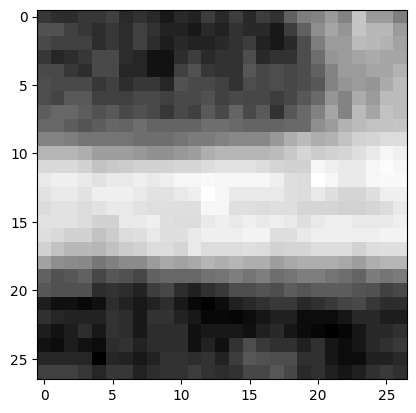

le patch numéro= 251


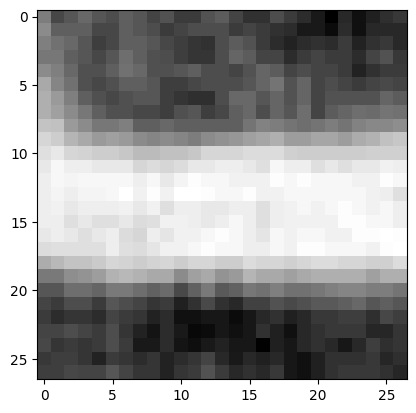

le patch numéro= 252


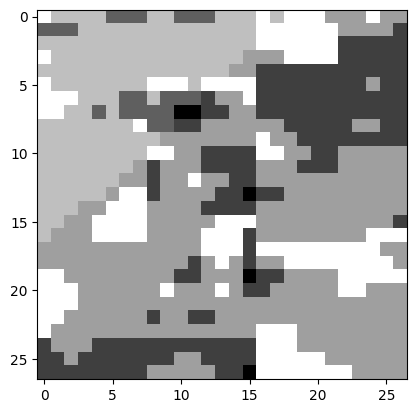

le patch numéro= 253


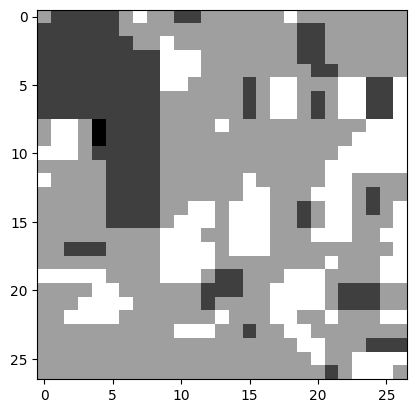

le patch numéro= 254


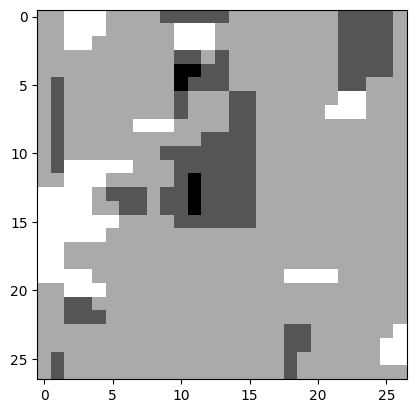

le patch numéro= 255


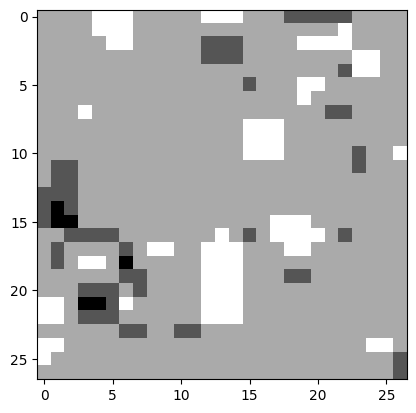

le patch numéro= 256


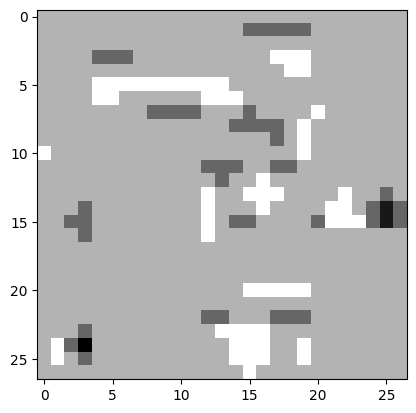

le patch numéro= 257


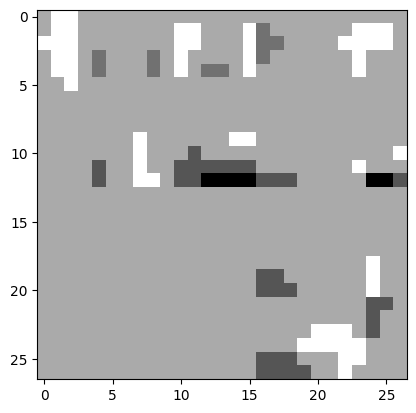

le patch numéro= 258


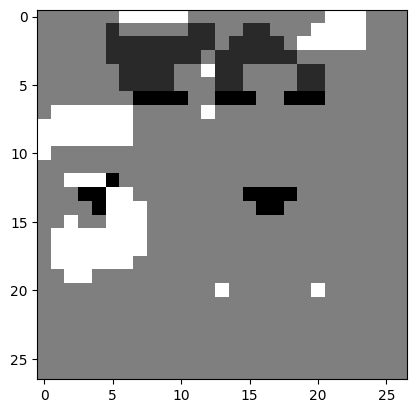

le patch numéro= 259


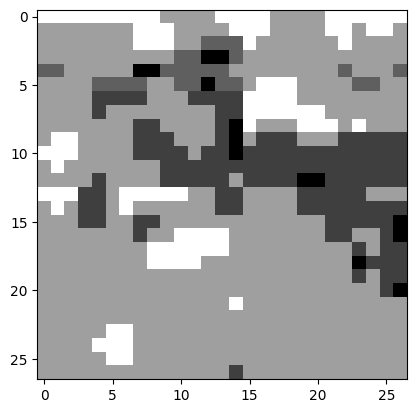

le patch numéro= 260


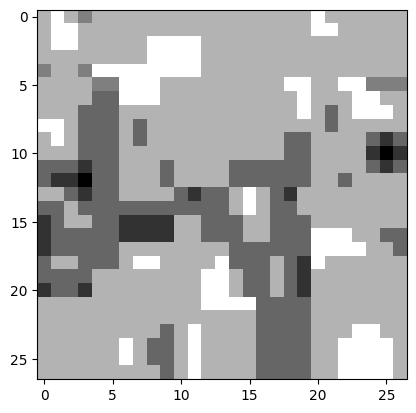

le patch numéro= 261


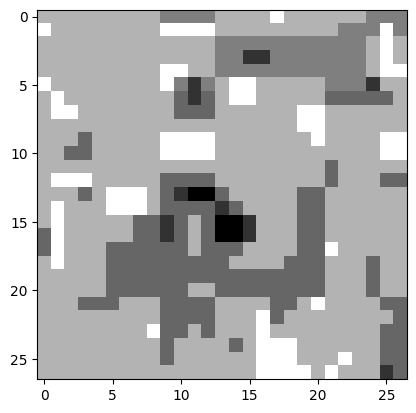

le patch numéro= 262


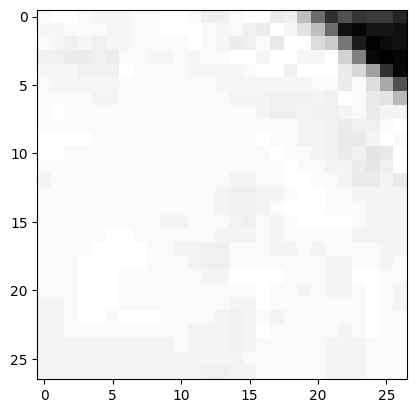

le patch numéro= 263


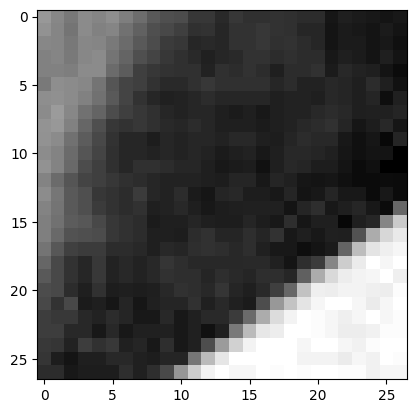

le patch numéro= 264


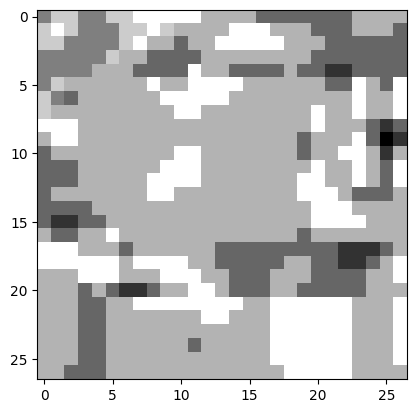

le patch numéro= 265


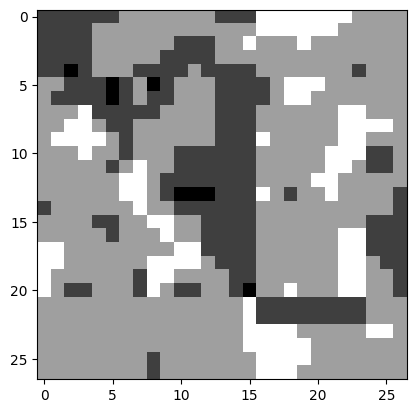

le patch numéro= 266


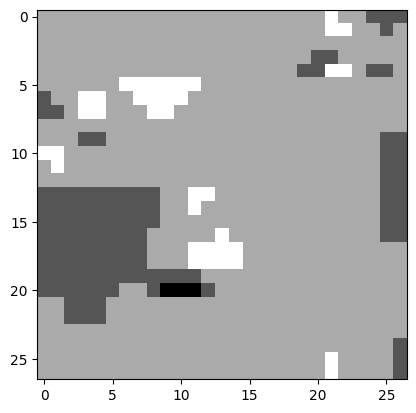

le patch numéro= 267


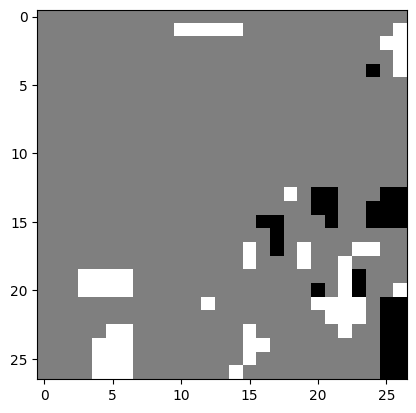

le patch numéro= 268


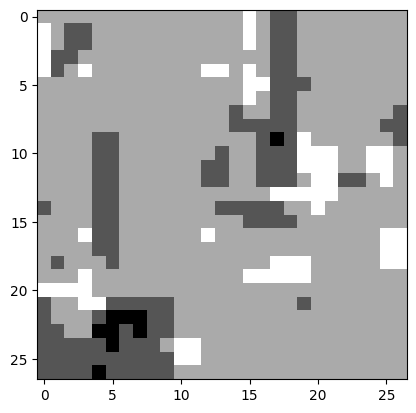

le patch numéro= 269


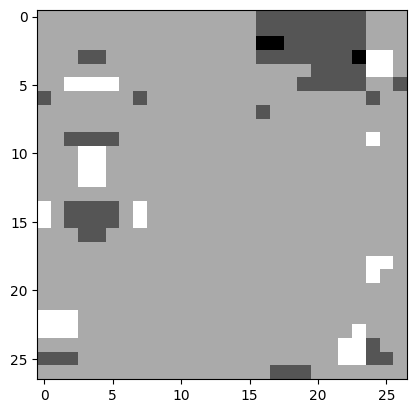

le patch numéro= 270


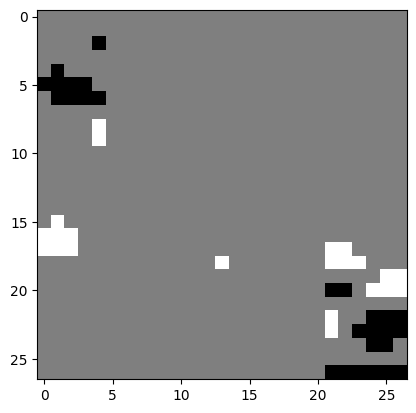

le patch numéro= 271


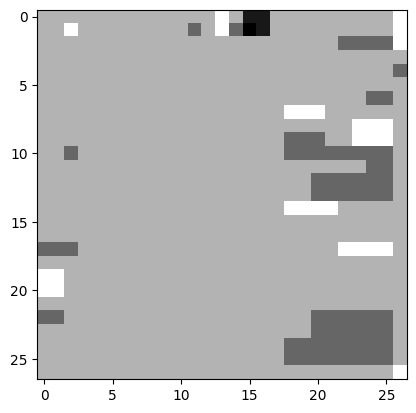

le patch numéro= 272


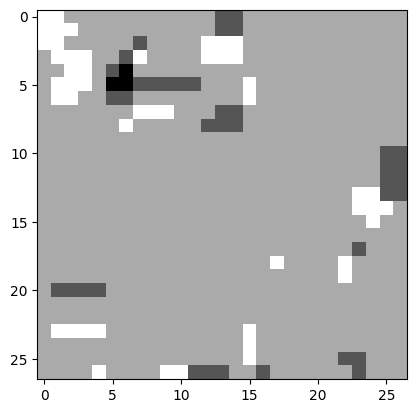

le patch numéro= 273


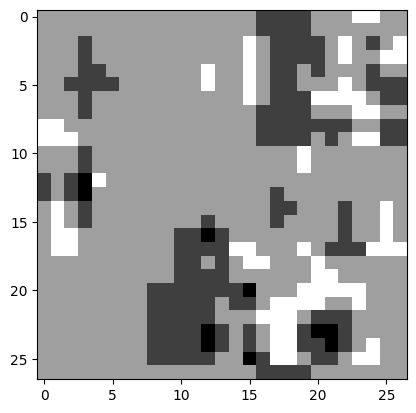

le patch numéro= 274


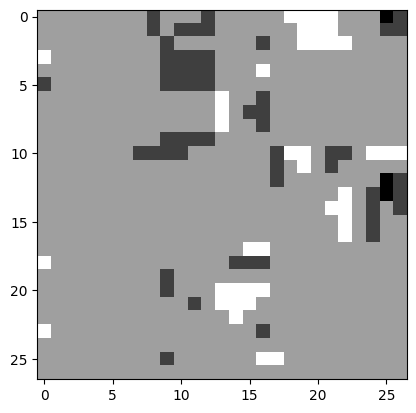

le patch numéro= 275


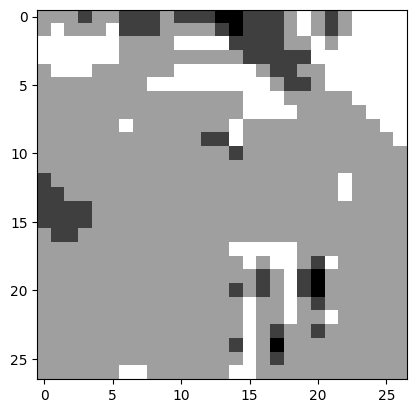

le patch numéro= 276


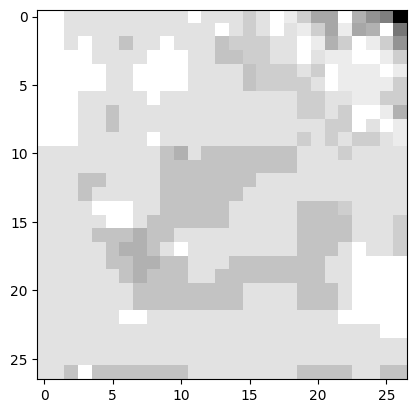

le patch numéro= 277


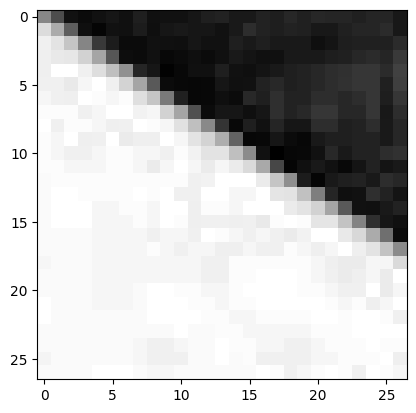

le patch numéro= 278


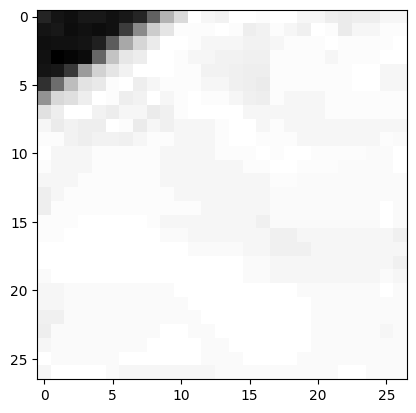

le patch numéro= 279


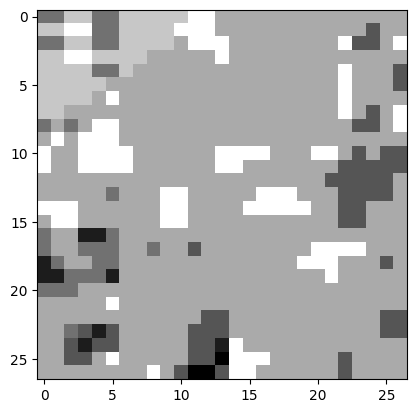

le patch numéro= 280


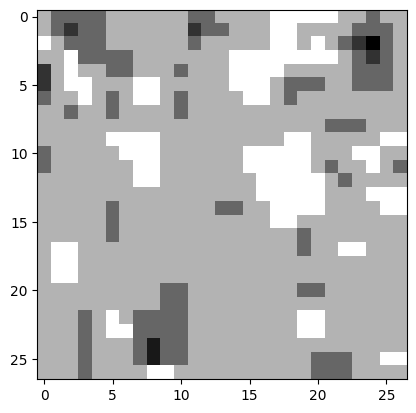

le patch numéro= 281


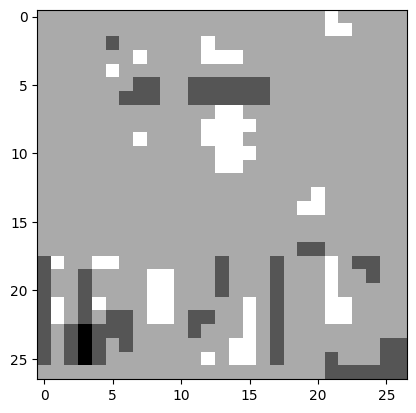

le patch numéro= 282


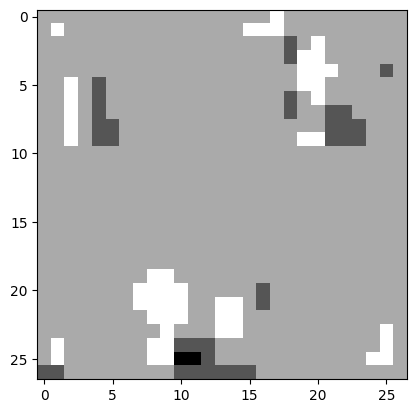

le patch numéro= 283


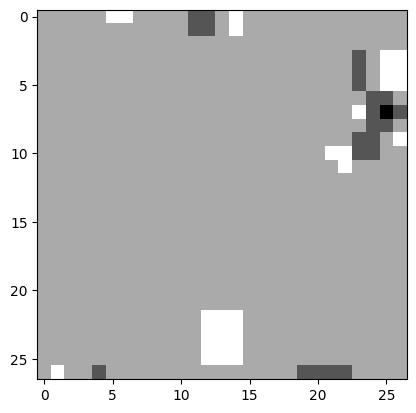

le patch numéro= 284


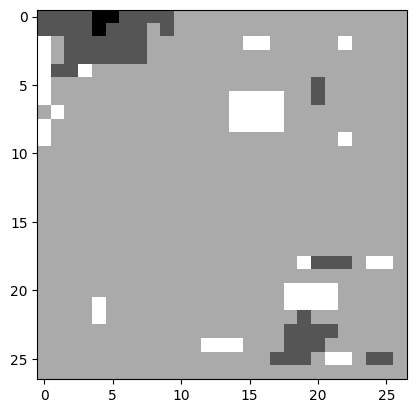

le patch numéro= 285


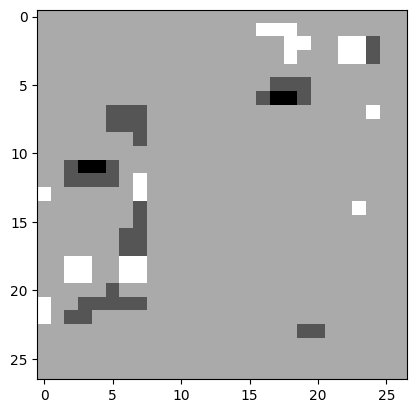

le patch numéro= 286


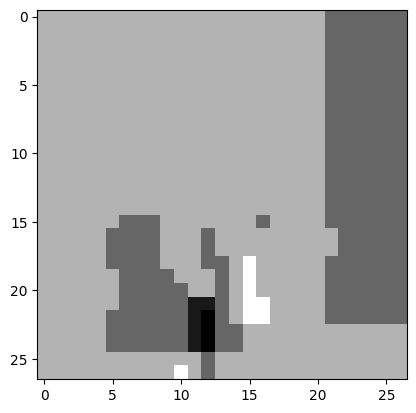

le patch numéro= 287


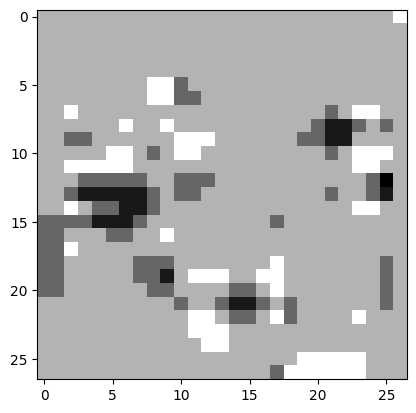

le patch numéro= 288


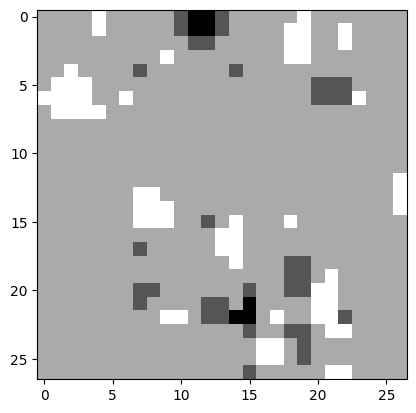

le patch numéro= 289


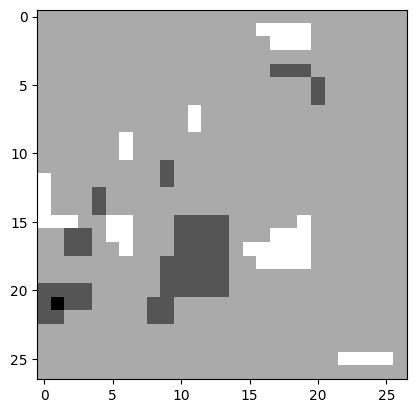

le patch numéro= 290


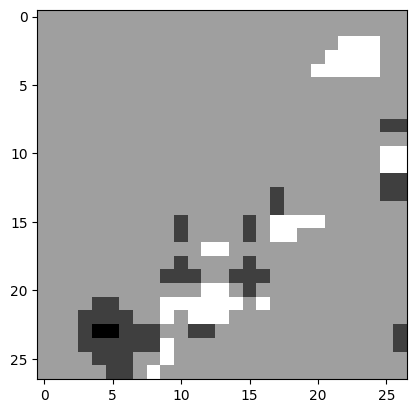

le patch numéro= 291


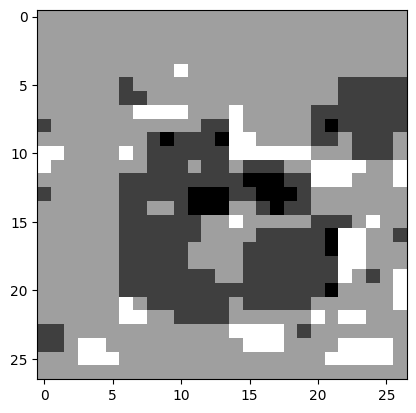

le patch numéro= 292


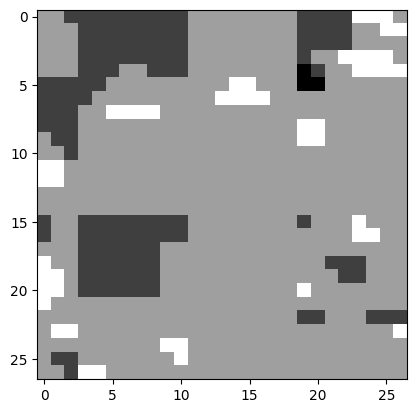

le patch numéro= 293


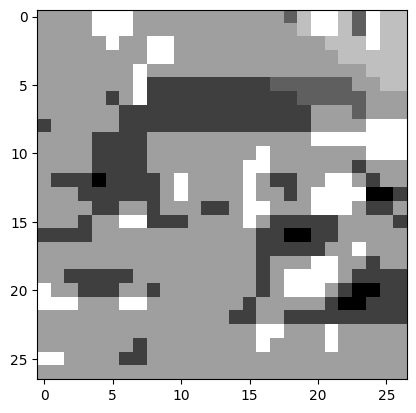

le patch numéro= 294


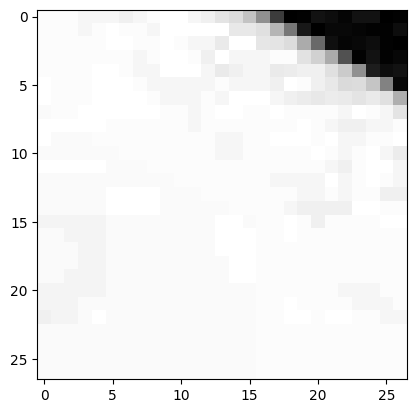

le patch numéro= 295


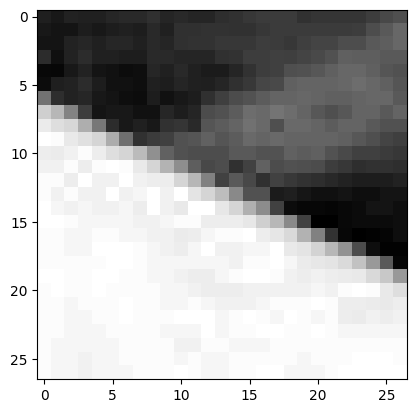

le patch numéro= 296


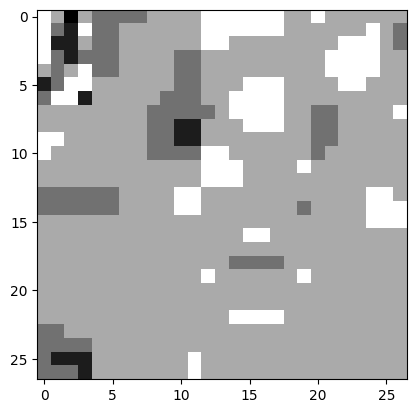

le patch numéro= 297


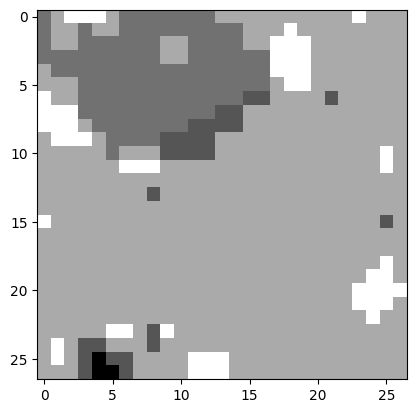

le patch numéro= 298


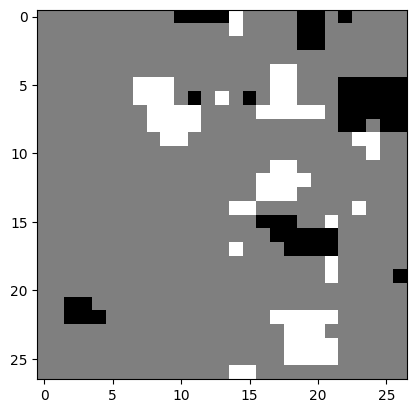

le patch numéro= 299


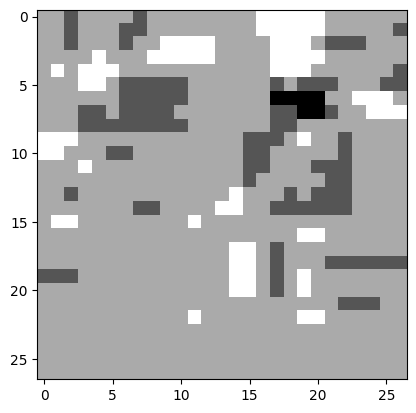

le patch numéro= 300


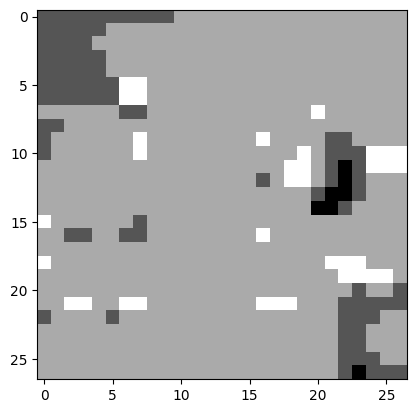

le patch numéro= 301


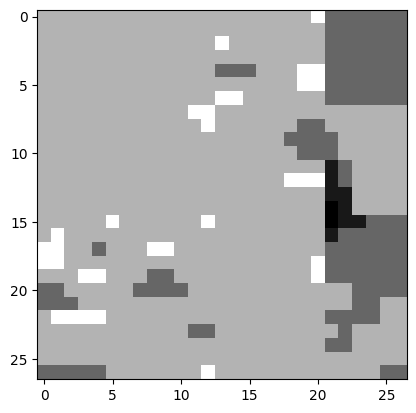

le patch numéro= 302


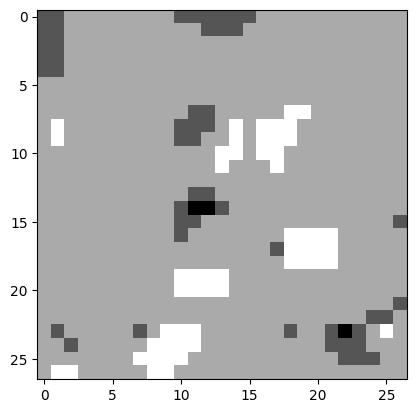

le patch numéro= 303


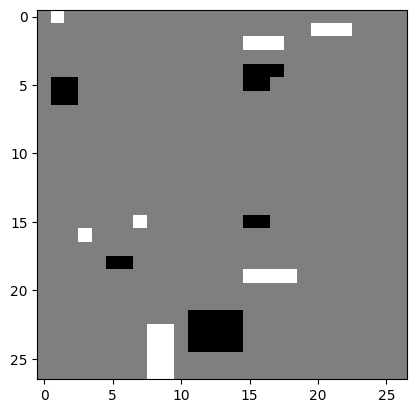

le patch numéro= 304


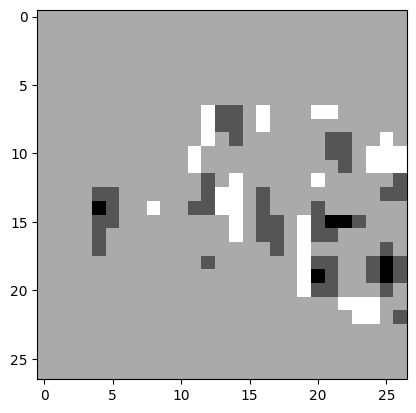

le patch numéro= 305


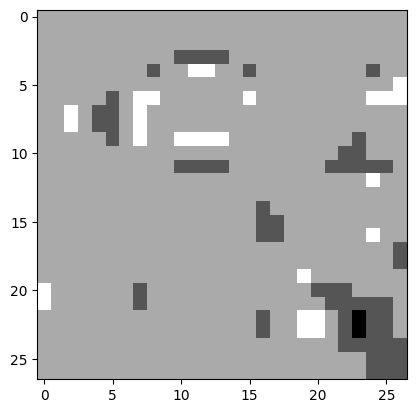

le patch numéro= 306


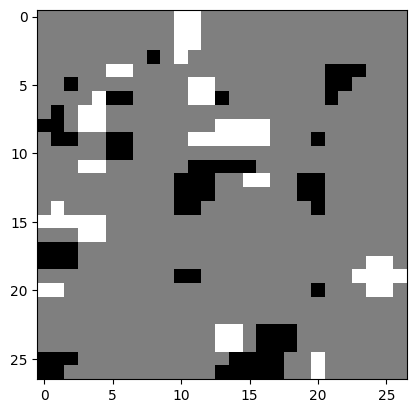

le patch numéro= 307


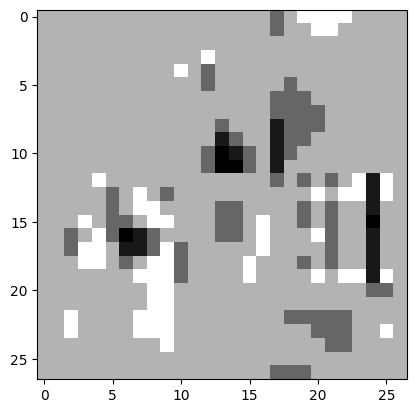

le patch numéro= 308


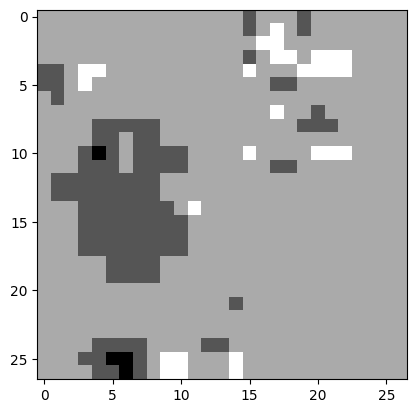

le patch numéro= 309


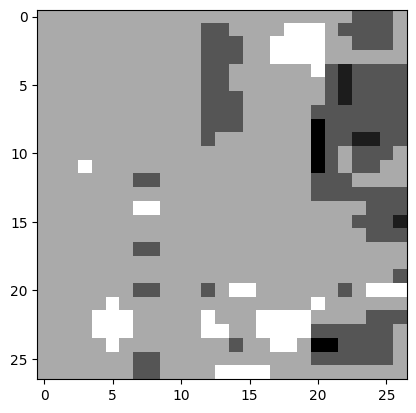

le patch numéro= 310


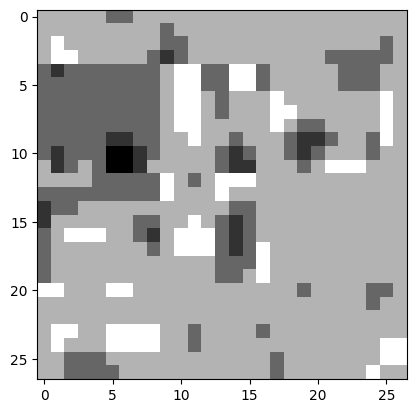

le patch numéro= 311


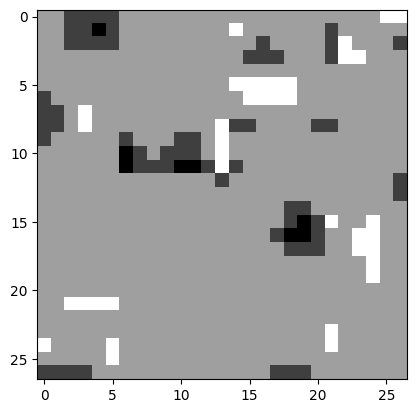

le patch numéro= 312


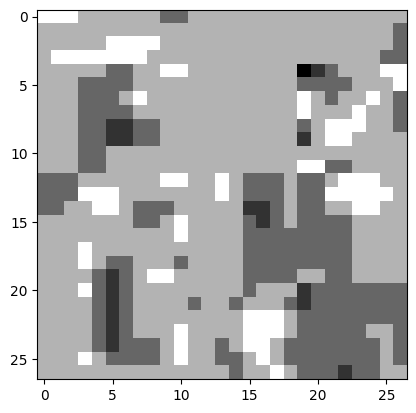

le patch numéro= 313


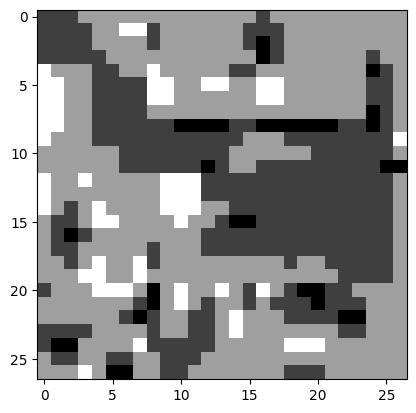

le patch numéro= 314


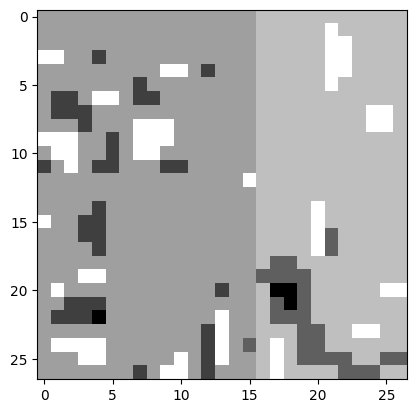

le patch numéro= 315


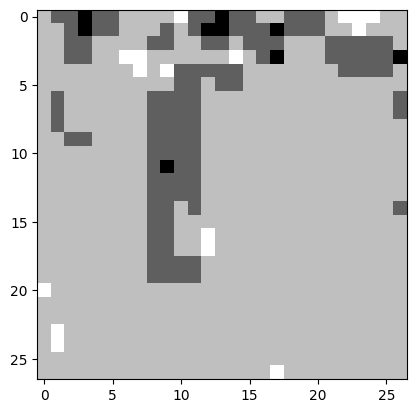

le patch numéro= 316


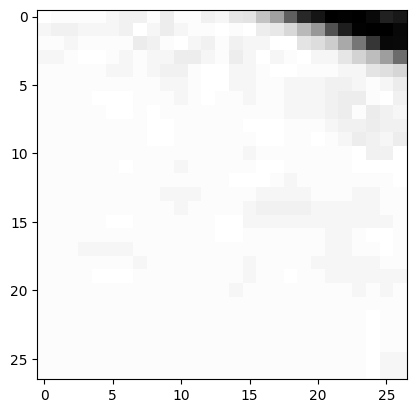

le patch numéro= 317


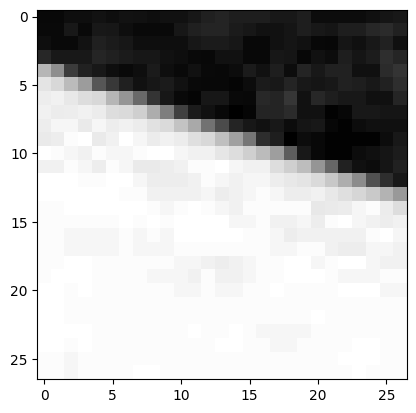

le patch numéro= 318


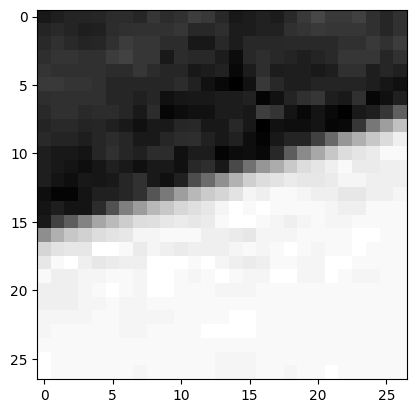

le patch numéro= 319


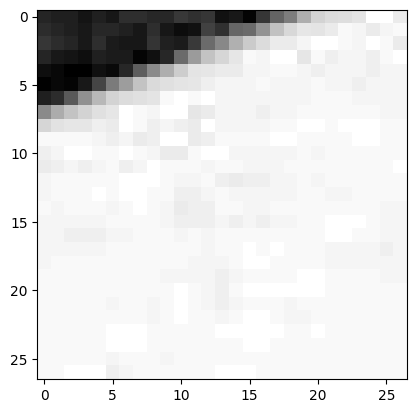

le patch numéro= 320


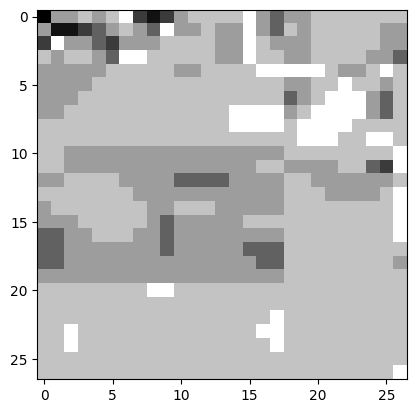

le patch numéro= 321


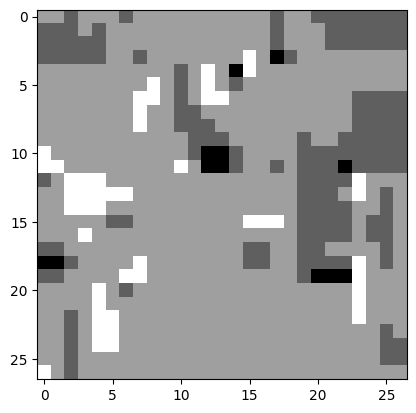

le patch numéro= 322


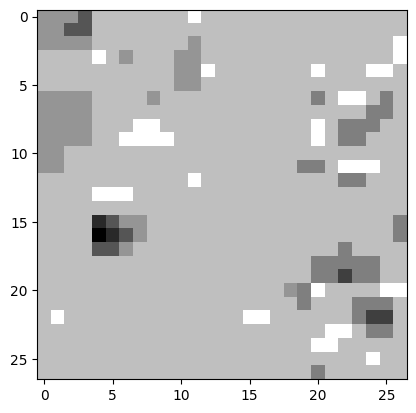

le patch numéro= 323


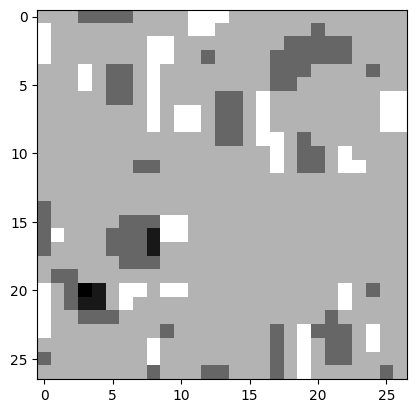

le patch numéro= 324


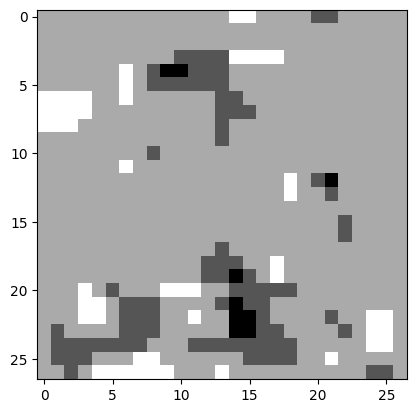

le patch numéro= 325


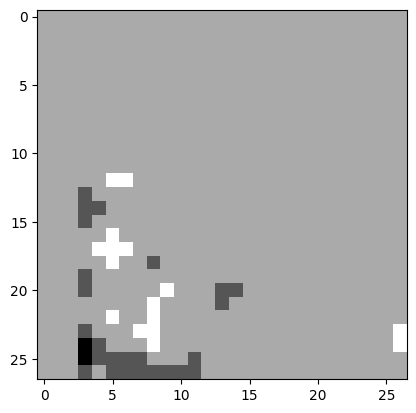

le patch numéro= 326


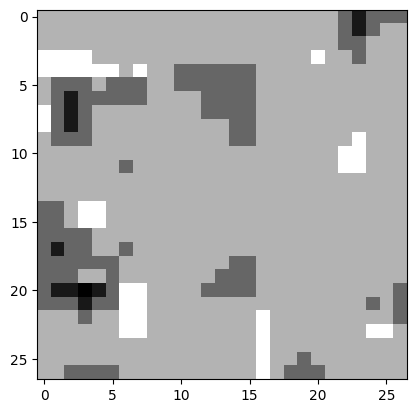

le patch numéro= 327


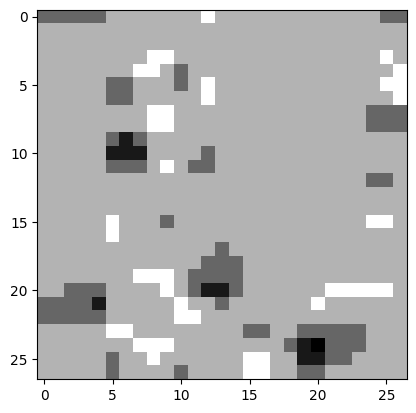

le patch numéro= 328


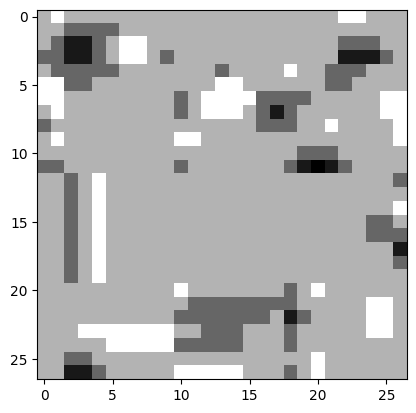

le patch numéro= 329


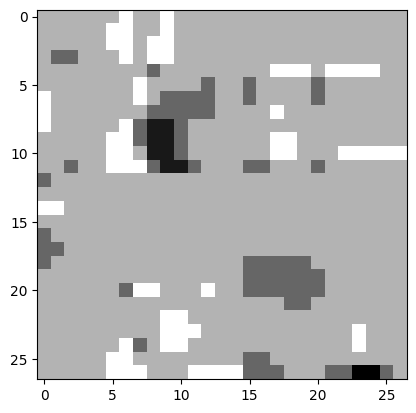

le patch numéro= 330


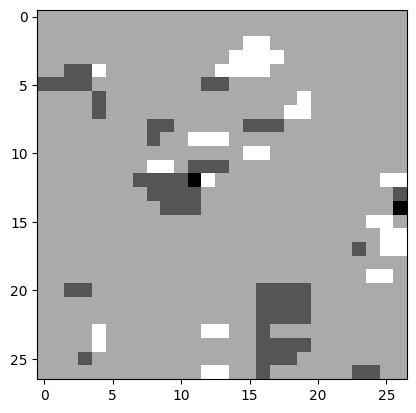

In [25]:
import matplotlib.pyplot as plt

patch_size = 27

for i in range(len(vessel_patches_copy)):
    print("le patch numéro=",i)
    plt.imshow(vessel_patches_copy[i].reshape((patch_size, patch_size)), cmap='binary')
    plt.show()

In [26]:
import cv2
import numpy as np

threshold = 2.0  # en mm
artery_thicknesses = []
vein_thicknesses = []
for i in range(len(vessel_patches_copy)):
    vessel_patch = vessel_patches_copy[i]
    if np.all(vessel_patch == 0):
        print('Patch', i+1, 'est entièrement noir. Il n\'y a pas ni veine ni artere detecté ')
        continue
    elif np.all(vessel_patch == 255):#image blanche
        print('Patch', i+1, 'est entièrement blanc.  Il n\'y a pas ni veine ni artere detecté ')
        continue
    
    ret, thresh = cv2.threshold(vessel_patch, 127, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    thicknesses = []
    for c in contours:
        perimeter = cv2.arcLength(c, True)
        if perimeter > 0:
            area = cv2.contourArea(c)
            thickness = area / perimeter
            thicknesses.append(thickness)
    arteries = 0
    veins = 0
    for t in thicknesses:
        if t > threshold:
            arteries += 1
            artery_thicknesses.append(t)
        else:
            veins += 1
            vein_thicknesses.append(t)
#     print('Patch', i+1)
#     print('Artères:', arteries)
#     print('Veines:', veins)
print(" le nombre des artère détecté =",len(artery_thicknesses))
print(" la nombre des veine détecté =",len(vein_thicknesses))
a=0
MA=0
for i in  range(len(artery_thicknesses)):
    a+=artery_thicknesses[i]
MA=a/(len(artery_thicknesses))
print("la somme de la liste des artères =",a)
print("la longeur de la liste des artères=",len(artery_thicknesses))
b=0
MV=0
for j in  range(len(vein_thicknesses)):
    b+=vein_thicknesses[j]
MV=b/len(vein_thicknesses)
print("la somme de la liste des veine =",b)
print("la longeur de la liste des veine=",len(vein_thicknesses))
AVR= a/b
print("Arteriovenous Ratio (AVR) = ",AVR)
if AVR > 0.9:
    print("rétinopathie hypertensive de stade 1")
elif 0.8 < AVR <= 0.9:
    print("rétinopathie hypertensive de stade 2")
elif 0.7 <= AVR <= 0.8:
    print("rétine saine")
elif 0.6 < AVR < 0.7:
    print("rétinopathie hypertensive de stade 3")
elif AVR <= 0.5:
    print("rétinopathie hypertensive de stade 4")

 le nombre des artère détecté = 25
 la nombre des veine détecté = 299
la somme de la liste des artères = 90.80407205018246
la longeur de la liste des artères= 25
la somme de la liste des veine = 121.94038598125805
la longeur de la liste des veine= 299
Arteriovenous Ratio (AVR) =  0.744659542607474
rétine saine


In [27]:
import numpy as np
patch_size=27
binary_image = np.zeros_like(img_clahe)
test= np.zeros_like(img_roi)
idx = 0
for i in range(0, img_clahe.shape[0]-patch_size, patch_size):
    for j in range(0, img_clahe.shape[1]-patch_size, patch_size):
        if predictions[idx][1] > predictions[idx][0]:  
            binary_image[i:i+patch_size, j:j+patch_size] = 255
        idx += 1

In [28]:
print(binary_image.shape)

(1018, 1024)


In [29]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/tt1.tiff',binary_image)

True

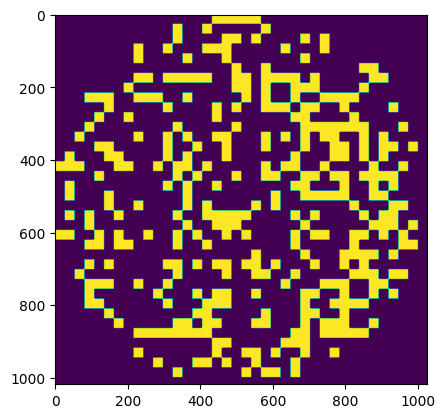

In [30]:
plt.imshow(binary_image)
plt.show()

In [31]:
overlay = cv2.addWeighted(img, 0.5, cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR), 0.5, 0)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/tt11.tiff',overlay)

True

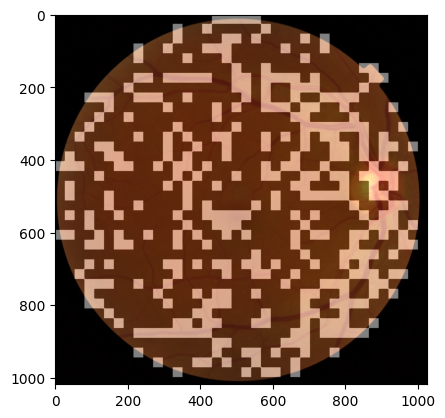

(1018, 1024, 3)


In [32]:
plt.imshow(overlay)
plt.show()
print(overlay.shape)

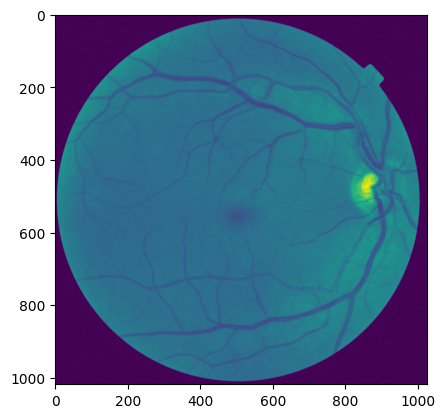

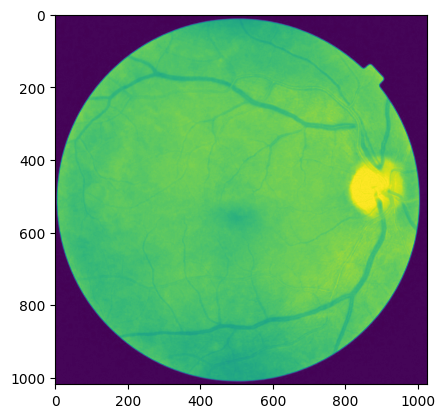

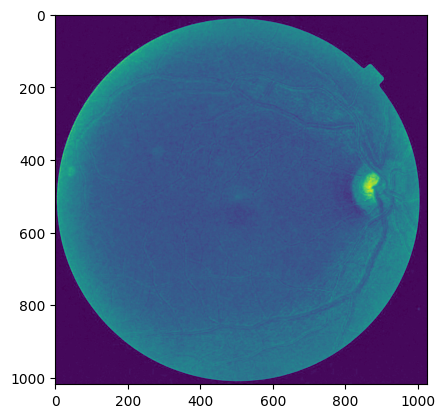

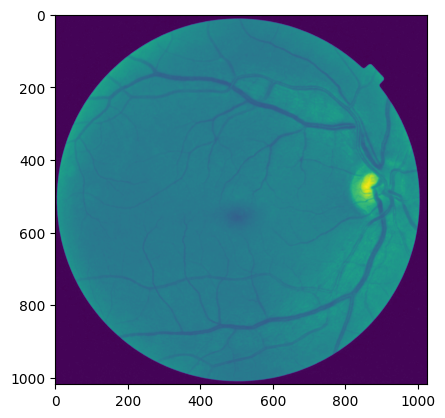

In [33]:
import cv2
import numpy as np
from math import sqrt 
import matplotlib.pyplot as plt
r,imageGreen,b = cv2.split(img)
plt.imshow(imageGreen)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/greenchannel.tiff',imageGreen)
plt.imshow(r)
plt.show()
plt.imshow(b)
plt.show()
plt.imshow( cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
plt.show()

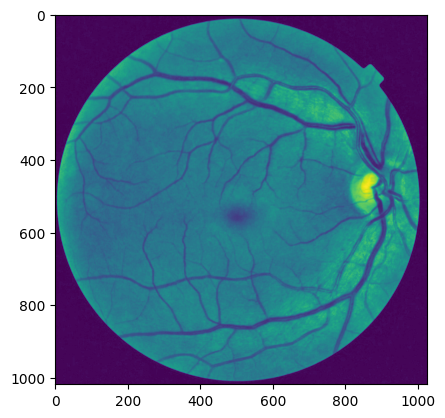

True

In [34]:
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
imageEqualized = clahe.apply(imageGreen)
plt.imshow(imageEqualized)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/equalized.tiff',imageEqualized)

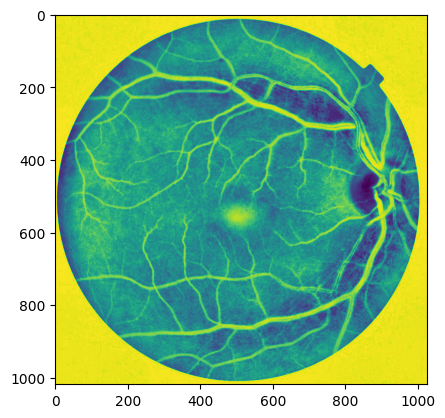

True

In [35]:
imageInv2 = 255 - imageEqualized
imageInv = clahe.apply(imageInv2)
plt.imshow(imageInv)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/inverted.tiff',imageInv)    

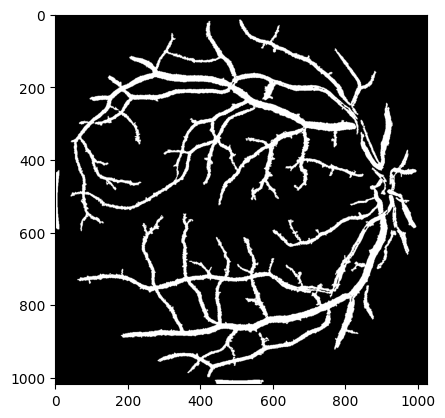

In [36]:
import cv2
import numpy as np
import os
import csv
import matplotlib.pyplot as plt


def extract_bv(image):
    b,green_fundus,r = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast_enhanced_green_fundus = clahe.apply(green_fundus)
    r1 = cv2.morphologyEx(contrast_enhanced_green_fundus, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
    R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)	
    f4 = cv2.subtract(R3,contrast_enhanced_green_fundus)
    f5 = clahe.apply(f4)
    ret,f6 = cv2.threshold(f5,15,255,cv2.THRESH_BINARY)
    mask = np.ones(f5.shape[:2], dtype="uint8") * 255
    contours, hierarchy = cv2.findContours(f6.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) <= 200:
            cv2.drawContours(mask, [cnt], -1, 0, -1)
    im = cv2.bitwise_and(f5, f5, mask=mask)
    ret,fin = cv2.threshold(im,15,255,cv2.THRESH_BINARY_INV)
    newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)
    fundus_eroded = cv2.bitwise_not(newfin)	
    xmask = np.ones(fundus.shape[:2], dtype="uint8") * 255
    xcontours, xhierarchy = cv2.findContours(fundus_eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)	
    for cnt in xcontours:
        shape = "unidentified"
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.04 * peri, False)  
        if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 and cv2.contourArea(cnt) >= 100:
            shape = "circle"	
        else:
            shape = "veins"
        if(shape=="circle"):
            cv2.drawContours(xmask, [cnt], -1, 0, -1)
    finimage = cv2.bitwise_and(fundus_eroded,fundus_eroded,mask=xmask)	
    blood_vessels = cv2.bitwise_not(finimage)
    return blood_vessels
if __name__ == "__main__":
    fundus = cv2.imread('C:/Users/soltan/Desktop/project jupyter/DB/try3.jpeg', cv2.IMREAD_COLOR)
    bloodvessel = extract_bv(fundus)
    cv2.imwrite("C:/Users/soltan/Desktop/project jupyter/DB/bloodvessel.tiff",bloodvessel)
#     plt.imshow(fundus, cmap='gray')
#     plt.show()
    plt.imshow(bloodvessel, cmap='binary')
    plt.show()

In [37]:
img = cv2.imread('C:/Users/soltan/Desktop/project jupyter/DB/veinskel.tiff', cv2.IMREAD_GRAYSCALE)
unique_values = np.unique(img)
print(unique_values)
if len(unique_values) == 2:
    print("L'image est binaire.")
else:
    print("L'image n'est pas binaire.")

[None]
L'image n'est pas binaire.


In [38]:
import cv2
import numpy as np

img = cv2.imread('C:/Users/soltan/Desktop/project jupyter/DB/tt11.tiff')
b, g, r = cv2.split(img)
mean_intensity = np.mean(g[mask > 0])
artery_mask = np.logical_and(mask, g > mean_intensity)
vein_mask = np.logical_and(mask, g <= mean_intensity)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/artery_mask.tiff', artery_mask.astype(np.uint8) * 255)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/vein_mask.tiff', vein_mask.astype(np.uint8) * 255)

True

1018
1018


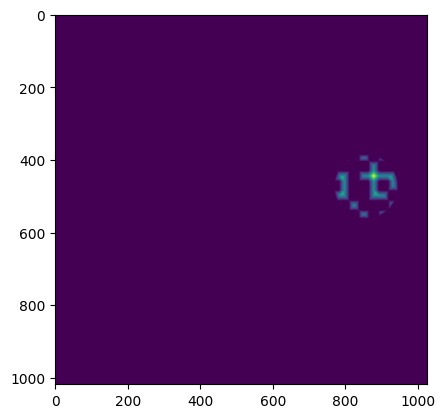

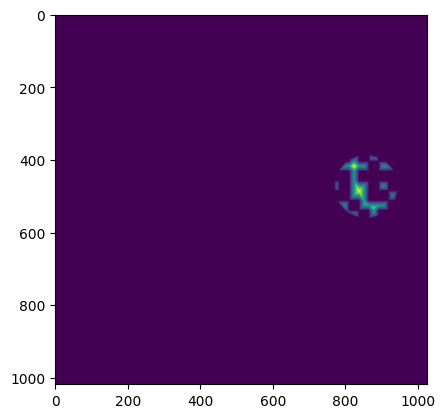

True

In [39]:
arteryDist = cv2.distanceTransform( artery_mask.astype(np.uint8) * 255,cv2.DIST_L1, cv2.DIST_MASK_PRECISE)
veinDist = cv2.distanceTransform( vein_mask.astype(np.uint8) * 255,cv2.DIST_L1, cv2.DIST_MASK_PRECISE)
print(len(arteryDist))
print(len(veinDist))
plt.imshow(arteryDist)
plt.show()
plt.imshow(veinDist)
plt.show()
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/veinDistmet2.tiff', veinDist)
cv2.imwrite('C:/Users/soltan/Desktop/project jupyter/DB/arteryDistmet2.tiff', arteryDist)

In [40]:
venuole = []
arteriole = []
for x in range(veinDist.shape[0]):
    for y in range( veinDist.shape[1]):
        if  veinDist[x][y] > 0:
            venuole.append(abs( veinDist[x][y]))
        if arteryDist[x][y] > 0:
            arteriole.append(abs(arteryDist[x][y]))

venuole = sorted(venuole)
arteriole = sorted(arteriole)
print("venuole=",venuole)
print("arteriole",arteriole)
lenven = len(venuole)
print('length of lenven {} {} {}'.format(lenven,lenven//2,lenven//2-1))
if lenven%2 == 1:
    Wa = venuole[lenven//2]
    if lenven//2 == 0:
        Wb = venuole[0]
    else:
        Wb = venuole[lenven//2 - 1]
else:
    Wa = (venuole[lenven//2 - 1] + venuole[lenven//2])// 2
    Wb = venuole[lenven//2 - 1]
print(Wa,Wb)
CRVE = sqrt(0.72*(Wa**2) + 0.91*(Wb**2) + 450.02)
print("CRVE=",CRVE)
lenart = len(arteriole)
print('length of lenart {} {} {}'.format(lenart,lenart//2,lenart//2-1))
if lenart%2 == 1:
    Wa = arteriole[lenart//2]
    if lenart//2 == 0:
        Wb = arteriole[0]
    else:
        Wb = arteriole[lenart//2 - 1]
else:
    Wa = (arteriole[lenart//2 - 1] + arteriole[lenart//2])// 2
    Wb = arteriole[lenart//2 - 1]

print(Wa,Wb)
CRAE = sqrt(0.8*(Wa**2) + 1.01*(Wb**2) - 0.22*Wa*Wb-10.73)
print("CRAE=",CRAE)
if len(venuole) == 0 or len(arteriole) == 0:
    print("Il n'y a pas de vaisseaux dans l'image")
else:
    artervenratio = CRAE/CRVE
print('arteriovenous ratio {}'.format(artervenratio))

venuole= [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [41]:
if 0.7 <= artervenratio <=1:
    predictedLabel="Cette rétine est en bonne santé."
else :
    predictedLabel="Cette rétine présente des anomalies."
print("la prediction de cette rétine : ",predictedLabel)

la prediction de cette rétine :  Cette rétine présente des anomalies.
